#**Premessa**

Il presente lavoro si pone come obiettivo l’analisi, tramite network, dei trasferimenti avvenuti in entrata ed in uscita, nelle squadre delle sette maggiori leghe europee in un arco temporale che comprende gli ultimi 15 anni, dal 2007 al 2021.
Le sette leghe prese in considerazione sono rispettivamente:  Serie A italiana, Premier League inglese, Liga spagnola, Bundesliga tedesca, Ligue1 Francese, Eredivisie olandese, Primeira liga portoghese.
Tutte e sette rappresentano la prima serie di ciascuno dei movimenti calcistici delle rispettive sette nazioni prese in considerazione.

Alle leghe citate appena sopra si aggiungono le serie minori riguardanti il campionato italiano. 
Infatti nell’analisi,  pur prendendo sporadicamente in considerazione anche i campionati stranieri (soprattutto come metro di paragone), l’obiettivo è quello di operare un focus che vada a fondo sui trasferimenti del calcio italiano.
Per questo abbiamo deciso di tenere in considerazione, per l’Italia, non solo la Serie A ma anche le leghe minori professionistiche Serie B e Serie C, spingendoci anche alla lega dilettantistica Serie D, ed al campionato Primavera dei giovani.
L’analisi si articola in una parte introduttiva ed in una parte di analisi vera e propria attraverso i grafi.

Parte introduttiva: La prima parte consiste in una panoramica generale, per fornire, tramite grafici commentati, un primo impatto di quelli che sono i grandi numeri che caratterizzano il calciomercato europeo ed italiano.

Parte core: La parte core invece si serve come strumento primario dei grafi, supportati da ulteriori grafici per mostrare le misure prese in considerazione. Essa si articola a sua volta in 4 punti.
Il primo punto 1a è l’unico in cui il primo grafo non è preceduto da una domanda, con l’obiettivo di farci guidare da esso e provare ad estrapolare alcune considerazioni preliminari; in tutti i restanti punti che compongono l’analisi,  l’obiettivo è quello di rispondere a quelle domande che ci siamo posti nel momento in cui abbiamo scelto di svolgere questo progetto:

1a) Concentrandoci sul calcio italiano nel suo complesso (tenendo conto dunque dalla Serie A fino alla Serie D ed al campionato Primavera) e rappresentando tutti gli scambi di tutte le società a tutti i livelli, è possibile trarre già alcune conclusioni dal grafo risultante?

1b) Cosa succede se consideriamo invece soglie minime via via più alte riguardanti il valore di mercato dei giocatori trasferiti? C’è un regime di oligarchia che porta una cerchia molto ristretta di squadre ad accentrare verso di sé l'acquisto dei migliori giocatori ‘depredando’ le squadre di fascia bassa, o al contrario c’è una distribuzione più equilibrata degli acquisti di valore?

2) Esistono, all’interno del campionato di Serie A delle squadre “satellite” di altre dal punto di vista dello scambio di giocatori? 
È possibile dunque rilevare delle sorta di “alleanze” tra squadre o gruppi di squadre che tendono a creare reti di scambi ricorrenti particolarmente fitte tra loro?

3) Quale percorso deve fare in Italia un calciatore per emergere dalle serie minori fino ad arrivare in un top club? Quanto è tortuosa la strada in termini di numero di squadre/leghe in cui passare prima di arrivare a destinazione?  Quali sono le squadre che più fanno da ponte verso il raggiungimento dei top club?

4) Considerate le squadre del campionato italiano di Serie A, è possibile stabilire se una squadra è di alto livello, medio livello o basso livello, basandosi soltanto sulle caratteristiche dei calciatori acquistati come età, valore di mercato e campionato di provenienza? Quali skills portano un calciatore a trasferirsi verso una grande squadra? Quali verso una squadra media? Quali verso una squadra di basso livello?



#**Dataset: descrizione e pre-processing**

Il dataset preso in considerazione conta 70.006 righe è disponibile al seguente link di GitHub:


https://github.com/d2ski/football-transfers-data 

Esso raccoglie tutti i trasferimenti delle top sette leghe europee citate nella premessa, e ad ognuna delle 70.006 righe corrisponde un trasferimento.  Gli anni presi in considerazione vanno dal 2010 al 2021.
La fonte da cui il dataset attinge le informazioni è il sito Transfermarkt https://www.transfermarkt.it/ . 

Sulla stessa pagina di GitHub indicata in precedenza è disponibile il codice, utilizzato dai creatori del dataset, per effettuare lo scraping delle informazioni. Questo ci ha permesso di analizzare il codice e di adattarlo alle nostre esigenze.
Abbiamo quindi eseguito il codice relativo allo scraping ma adattandolo alle nostre esigenze. Nello specifico abbiamo:

-estratto anche gli anni 2007-2008, che si aggiungono agli anni dal 2009 al 2021 già presenti nel dataset. In questo modo è stato possibile allargare l’analisi agli ultimi 15 anni.
-estratto anche i trasferimenti relativi ai campionati italiani di Serie B, Serie C, Serie D, Campionato Primavera. Questo ci ha consentito di poter andare a fondo nel nostro focus sui trasferimenti delle squadre italiane.

Il dataset così ottenuto, nonostante asecondasse le nostre esigenze in termini di anni e campionati da considerare, ci ha messo comunque di fronte a diverse sfide affrontate nella fase di pre-processing. Di seguito verranno descritti soltanto i passaggi che hanno consentito di risolvere le problematiche più evidenti:
Nel dataset, come accennato precedentemente, i team coinvolti nel trasferimento 
sono team1 e team2. 
Se la colonna “dir” è impostata su “left”, allora il giocatore passa da team1 a team2; se la colonna “dir” è impostata su “in” allora il giocatore passa da team2 a team1.
Abbiamo ritenuto che questo potesse creare delle ambiguità, di conseguenza abbiamo trasformato tutte le colonne “in” in “left”, invertendo i valori di team1 e team2

b)Per la quasi totalità delle colonne i valori mancanti riscontrati sono stati pochissimi. Le uniche due colonne problematiche da questo punto di vista sono state il transfer value ed il market value, entrambe necessarie per svolgere la nostra analisi.
In particolare per il market value, non solo gli Na sono presenti in numero rilevante, ma abbiamo riscontrato che, per ogni trasferimento, il market value associato a quel trasferimento non è quello relativo al momento in cui il trasferimento avviene (come dovrebbe essere) ma quello relativo al valore di mercato attuale del giocatore (nel 2022).
Di conseguenza la colonna market value è stata completamente azzerata.
Per ricavare le informazioni relative ai market value ed ai transfer value mancanti ci siamo serviti di un secondo dataset, denominato da noi dataset_aggiuntivo.csv:

Questo dataset, al contrario del nostro, presenta meno righe e meno informazioni nelle colonne, ma buone percentuali sulle colonne market value e transfer value. Abbiamo dunque implementato un algoritmo che permettesse, per ogni riga del nostro dataset con valori mancanti nel transfer/market value, di individuarlo e prenderlo dal dataset aggiuntivo, facendo il match con il nome del giocatore, stagione, squadra di arrivo, squadra di partenza.

c)La colonna relativa al campionato di appartenenza del team2 NON esiste. Di conseguenza per ogni squadra della colonna team2, siamo andati a prelevare la lega di appartenenza di quella squadra quando la squadra è presente nella colonna team1, ricordando che per il team1 ESISTE la colonna relativa al campionato di appartenenza.

d)Le squadre che negli anni presi in analisi sono fallite e state poi rifondate con ridenominazione, presentano diversi nomi ma riferiti in realtà alla medesima squadra. In questo caso abbiamo cercato, man mano che le incontravamo durante la nostra analisi, di fare in modo, il più possibile, di unificare queste denominazioni multiple in unica denominazione che indicasse quella squadra.

Legenda sulle leghe di appartenenza: sia per il team1 che per il team2, tramite il codice scritto da noi, abbiamo fatto in modo che:

-le leghe squadre appartenenti alle top7 nazioni prese in considerazione escludendo l’Italia, cioè Germania, Inghilterra, Spagna, Francia, Portogallo, Olanda, fossero indicate rispettivamente:
a) con GER1, ENG1, SPA1, FRA1, POR1, NET1 se appartenenti al massimo livello calcistico di quella nazione
b)con GER2, ENG2, SPA2, FRA2, POR2, NET2 se appartenenti alle serie calcistiche minori di quella nazione.

-le leghe delle squadre appartenenti a tutte le altre nazioni corrispondono alle prime 3 lettere del nome di quella nazione. 
-le leghe delle squadre appartenenti al sistema calcistico italiano fossero indicate rispettivamente con:
a)ITA1 per le squadre appartenenti alla Serie A
b)ITA2 per le squadre appartenenti alla Serie B
c)ITA3 per le squadre appartenenti alla Serie C
d)ITA4 per le squadre appartenenti alla Serie D
e)ITAJ per le squadre appartenenti al Campionato Primavera.
Di seguito il codice contenente le operazioni sopra descritte. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.lines import Line2D
import networkx as nx
import random
import numpy as np
import itertools
import networkx.algorithms.community as nxcom
import requests
from bs4 import BeautifulSoup

In [ ]:
#CREATING DATASET 
import pandas as pd
from collections import defaultdict

#CARICAMENTO DATASET:
df_nostro= pd.read_csv('https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_grezzo07-21.csv')
df_agg1=pd.read_csv('https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_aggiuntivo1.csv')
df_agg2=pd.read_csv('https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_aggiuntivo2.csv')


#RINOMINAZIONE COLONNE:
df_nostro.rename(columns = {'league':'league_team1', 'team_name':'team1', 'team_country':'country_team1',
                     'counter_team_name':'team2','counter_team_country':'country_team2',
                     'transfer_fee_amnt':'transfer_value','market_val_amnt':'market_value'}, inplace = True)

#RINOMINAZIONE VALORI COLONNA LEGHE:
df_nostro['league_team1'].replace('IT1','ITA1',inplace=True)
df_nostro['league_team1'].replace('IT2','ITA2',inplace=True)
df_nostro['league_team1'].replace(['ITJ1','ITJ2','IJ1','IJ2A','IJ2B'],'ITAJ',inplace=True)
df_nostro['league_team1'].replace(['IT3A','IT3B','IT3C'],'ITA3',inplace=True)
df_nostro['league_team1'].replace('ES1','SPA1',inplace=True)
df_nostro['league_team1'].replace('GB1','ENG1',inplace=True)
df_nostro['league_team1'].replace('L1','GER1',inplace=True)
df_nostro['league_team1'].replace('FR1','FRA1',inplace=True)
df_nostro['league_team1'].replace('PO1','POR1',inplace=True)
df_nostro['league_team1'].replace('NL1','NET1',inplace=True)


#CREAZIONE DELLA COLONNA CHE CONTIENE LA LEGA DI APPARTENENZA DEL TEAM 2
#IL DATASET INIZIALMENTE HA SOLTANTO LA COLONNA DELLA LEGA DI APPARTENENZA DEL TEAM 1:
lista_colonna_league2=[]

for row in df_nostro.itertuples():
    top_countries=['England','Spain','Germany','Portugal','France','Netherlands']
    if any([row.country_team2 == top_country for top_country in top_countries]):
        if row.team2 in set(list(df_nostro[(df_nostro['league_team1']==row.country_team2[:3].upper()+'1') & (df_nostro['season']==row.season)]['team1'])):
            lista_colonna_league2.append(row.country_team2[:3].upper()+'1')
        else:
            lista_colonna_league2.append(row.country_team2[:3].upper()+'2')

    elif row.country_team2=='Italy':

        if  len(list(df_nostro[(df_nostro['team1'] == row.team2)& (df_nostro['season'] == row.season)]['league_team1']))>0:
            lista_colonna_league2.append(list(df_nostro[(df_nostro['team1']==row.team2)&(df_nostro['season']==row.season)]['league_team1'])[0])
        else:
            lista_colonna_league2.append(row.country_team2[:3].upper()+'4')
    else:
        lista_colonna_league2.append(row.country_team2[:3].upper())

df_nostro['league_team2']=lista_colonna_league2

df_nostro.league_team2[df_nostro['team2'].str.contains('Youth')]='ITAJ'
df_nostro.league_team2[df_nostro['team2'].str.contains('Under 17')]='ITAJ'
df_nostro.league_team2[df_nostro['team2'].str.contains('Under 18')]='ITAJ'
df_nostro.league_team2[df_nostro['team2'].str.contains('Primavera')]='ITAJ'
df_nostro.league_team2[df_nostro['team2'].str.contains('Berretti')]='ITAJ'
df_nostro.league_team2[df_nostro['team2'].str.contains('Juniores')]='ITAJ'
df_nostro.league_team2[df_nostro['team2'].str.contains('Lazio U19')]='ITAJ'


#ELIMINAZIONE TRANSFER ID DUPLICATI, RESTANO SOLO I LEFT:
df_nostro.drop_duplicates(subset='transfer_id',ignore_index=True,inplace=True)

condition = df_nostro['dir'] == 'in'

df_nostro.loc[condition, ['team1', 'team2']] = (
    df_nostro.loc[condition, ['team2', 'team1']].values)

df_nostro.loc[condition, ['country_team1', 'country_team2']] = (
    df_nostro.loc[condition, ['country_team2', 'country_team1']].values)

df_nostro.loc[condition, ['league_team1', 'league_team2']] = (
    df_nostro.loc[condition, ['league_team2', 'league_team1']].values)


df_nostro['dir'].replace(['in'],'left',inplace=True)


#CONTEGGIO NA DELLE VARIE COLONNE PRIMA DELLA PULIZIA:
print('CONTEGGIO NA PRE PULIZIA\n')

for column in df_nostro.columns:
    print(column,df_nostro[f'{column}'].isna().sum())


#ELIMINAZIONE COLONNE INUTILI:
df_nostro.drop(columns=['player_nation2','team_id','counter_team_id'],inplace=True,axis=1)


#ELIMINAZIONE DEGLI NA CHE RAPPRESENTANO UNA PARTE NON SIGNIFICATIVA DEL TOTALE DELLE OSSERVAZIONI:
df_nostro.dropna(subset=['player_age','player_nation','country_team2','transfer_id'],inplace=True)

#OTTENIMENTO DELLA LISTA DI TUTTI I RUOLI DI TRANSFERMARKT (PRESI UNA SOLA VOLTA):
print(df_nostro.player_pos.unique())



#ACCORPAMENTO DEI VARI RUOLI NELLE 4 MACROCATEGORIE: PORTIERE, DIFENSORE, CENTROCAMPISTA, ATTACCANTE:
df_nostro['player_pos'].replace(['GK'],'goalkeeper',inplace=True)
df_nostro['player_pos'].replace(['RB','CB','LB','defence'],'defender',inplace=True)
df_nostro['player_pos'].replace(['CM','AM','DM','LM','RM','midfield'],'midfielder',inplace=True)
df_nostro['player_pos'].replace(['CF','SS','LW','RW','attack'],'striker',inplace=True)

#ASSEGNAZIONE DEL VALORE ZERO AL VALORE DEL TRASFERIMENTO QUANDO IS FREE= TRUE; IS END LOAN= TRUE, TEAM2=WITHOUT CLUB:
df_nostro.loc[(df_nostro['is_loan_end'] == True) |(df_nostro['is_retired']==True)| (df_nostro['is_free']==True) | (df_nostro['team2']=='Without Club'), 'transfer_value'] = 0.0

# #CONTEGGIO DEGLI NA UNA VOLTA TERMINATA LA PULIZIA:
print('CONTEGGIO NA POST PULIZIA \n')

for column in df_nostro.columns:
    print(column,df_nostro[f'{column}'].isna().sum())

# #LA COLONNA DELL'ETA HA VALORI DI TIPO STRINGA, DOVREBBERO ESSERE INVECE NUEMERICI
# #CONVERTIAMO TUTTI I VALORI DELLA COLONNA ETA PRIMA IN FLOAT E POI IN INTERI:
df_nostro=df_nostro.astype({'player_age':float})
df_nostro=df_nostro.astype({'player_age':int})

#CONTEGGIO DEL TIPO DI VALORI ALL'INTERNO DI CIASCUNA COLONNA:
for column in df_nostro.columns:
    print(column)
    print('numero stringhe', sum([1 for row in df_nostro[f'{column}']if type(row)==str]))
    print('numero float', sum([1 for row in df_nostro[f'{column}'] if type(row) == float]))
    print('numero interi', sum([1 for row in df_nostro[f'{column}'] if type(row) == int]))
    print('numero booleani', sum([1 for row in df_nostro[f'{column}'] if type(row) == bool]))


#OTTENIMENTO DEI VALORI MANCANTI DEL MARKET VALUE ANDANDOLI A PESCARE DAL DATASET DEI COLLEGHI CAGLIARITANI:
dict_na={}

dict_na['giocatori']=df_nostro['player_name'].tolist()
dict_na['squadre_partenza']=df_nostro['team1'].tolist()
dict_na['squadre_arrivo']=df_nostro['team2'].tolist()
dict_na['eta']=df_nostro['player_age'].tolist()
dict_na['finestre']=df_nostro['window'].tolist()


condition2 = df_agg2['movement'] == 'in'

df_agg2.loc[condition2, ['club', 'dealing_club']] = (
    df_agg2.loc[condition2, ['dealing_club', 'club']].values)

df_agg2['movement'].replace(['in'],'out',inplace=True)


df_agg2['market_value']=df_agg2['market_value'].fillna('-')

condition3 = df_agg1['Movement'] == 'In'

df_agg1.loc[condition3, ['Club', 'ClubInvolved']] = (
    df_agg1.loc[condition3, ['ClubInvolved', 'Club']].values)

df_agg1['Movement'].replace(['In'],'Out',inplace=True)

df_agg1['Costo'] = df_agg1['Costo'].fillna("-")
df_agg1['Costo']=df_agg1['Costo'].str.findall('(?<=:).*$').apply(','.join)
df_agg1['Costo'][df_agg1['Costo']=='']='0 €'


lista_market_values=[]

for segnalibro in range(0,len(dict_na['giocatori'])):
    check=False
    for row in df_agg2.itertuples():

        if (row.name==dict_na['giocatori'][segnalibro] and row.club==dict_na['squadre_partenza'][segnalibro] and
                 row.dealing_club== dict_na['squadre_arrivo'][segnalibro] and str(row.age)[:2]==str(dict_na['eta'][segnalibro])):
            lista_market_values.append(row.market_value)
            check=True
            break

        elif (row.name==dict_na['giocatori'][segnalibro] and str(row.age)[:2]==str(dict_na['eta'][segnalibro])):
            lista_market_values.append(row.market_value)
            check = True
            break

    if not check:
        lista_market_values.append('NF')

df_nostro['market_value']=lista_market_values

lista_market_values2=[]

dict_na2 = {}


dict_na2['giocatori'] = df_nostro.loc[(df_nostro['market_value'] == '-')|(df_nostro['market_value']=='NF'), 'player_name'].tolist()
dict_na2['squadre_partenza'] = df_nostro.loc[(df_nostro['market_value'] == '-')|(df_nostro['market_value']=='NF'), 'team1'].tolist()
dict_na2['squadre_arrivo'] = df_nostro.loc[(df_nostro['market_value'] == '-')|(df_nostro['market_value']=='NF'), 'team2'].tolist()
dict_na2['eta'] = df_nostro.loc[(df_nostro['market_value'] == '-')|(df_nostro['market_value']=='NF'), 'player_age'].tolist()

for segnalibro in range(0,len(dict_na2['giocatori'])):
    check=False
    for row in df_agg1.itertuples():

        if (row.Name==dict_na2['giocatori'][segnalibro] and row.Club==dict_na2['squadre_partenza'][segnalibro] and
                 row.ClubInvolved== dict_na2['squadre_arrivo'][segnalibro] and str(row.Età)==str(dict_na2['eta'][segnalibro])) :
            lista_market_values2.append(row.MarketValue)
            check=True
            break

        elif (row.Name==dict_na2['giocatori'][segnalibro] and str(row.Età)==str(dict_na2['eta'][segnalibro])):
            lista_market_values2.append(row.MarketValue)
            check = True
            break

    if not check:
        lista_market_values2.append('NF')

df_nostro.market_value[(df_nostro.market_value=='-')|df_nostro.market_value=='NF']=lista_market_values2


#OTTENIMENTO DEI VALORI MANCANTI DEL TRANSFER VALUE ANDANDOLI A PESCARE DAL DATASET DEI COLLEGHI CAGLIARITANI:

df_agg2['fee']=df_agg2['fee'].fillna('-')

dict_na3 = {}

dict_na3['giocatori'] = df_nostro.loc[df_nostro['transfer_value'].isna(), 'player_name'].tolist()
dict_na3['squadre_partenza'] = df_nostro.loc[df_nostro['transfer_value'].isna(), 'team1'].tolist()
dict_na3['squadre_arrivo'] = df_nostro.loc[df_nostro['transfer_value'].isna(), 'team2'].tolist()
dict_na3['eta'] = df_nostro.loc[df_nostro['transfer_value'].isna(), 'player_age'].tolist()


lista_transfer_values=[]
for segnalibro in range(0,len(dict_na3['giocatori'])):
    check=False
    for row in df_agg2.itertuples():

        if (row.name==dict_na3['giocatori'][segnalibro] and row.club==dict_na3['squadre_partenza'][segnalibro] and
                 row.dealing_club== dict_na3['squadre_arrivo'][segnalibro] and str(row.age)[:2]==str(dict_na3['eta'][segnalibro])):

            lista_transfer_values.append(row.fee)
            check=True
            break

    if not check:
        lista_transfer_values.append('NF')


df_nostro.loc[pd.isnull(df_nostro['transfer_value']),'transfer_value']=lista_transfer_values

dict_na4 = {}

dict_na4['giocatori'] = df_nostro.loc[(df_nostro['transfer_value'] == '-')|(df_nostro['transfer_value']=='NF')|(df_nostro['transfer_value']=='?'), 'player_name'].tolist()
dict_na4['squadre_partenza'] = df_nostro.loc[(df_nostro['transfer_value'] == '-')|(df_nostro['transfer_value']=='NF')|(df_nostro['transfer_value']=='?'), 'team1'].tolist()
dict_na4['squadre_arrivo'] = df_nostro.loc[(df_nostro['transfer_value'] == '-')|(df_nostro['transfer_value']=='NF')|(df_nostro['transfer_value']=='?'), 'team2'].tolist()
dict_na4['eta'] = df_nostro.loc[(df_nostro['transfer_value'] == '-')|(df_nostro['transfer_value']=='NF')|(df_nostro['transfer_value']=='?'), 'player_age'].tolist()
lista_transfer_values2=[]


for segnalibro in range(0,len(dict_na4['giocatori'])):
    check=False
    for row in df_agg1.itertuples():

        if (row.Name==dict_na4['giocatori'][segnalibro] and row.Club==dict_na4['squadre_partenza'][segnalibro] and
                 row.ClubInvolved== dict_na4['squadre_arrivo'][segnalibro] and str(row.Età)==str(dict_na4['eta'][segnalibro])):
            lista_transfer_values2.append(row.Costo)
            check=True
            break

    if not check:
        lista_transfer_values2.append('NF')


df_nostro.transfer_value[(df_nostro.transfer_value=='?')|(df_nostro.transfer_value=='-')|(df_nostro.transfer_value=='NF')]=lista_transfer_values2

df_nostro.to_csv('dataset_completo07-21.csv')

############################################### CREATING DATASET FOR THE ANALYSIS EXCEPT THIRD QUESTION ##########################################################################################
df_completo=pd.read_csv('https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_completo07-21.csv')

#UNIFICAZIONE DIVERSI NOMI PER STESSA SQUADRA:
df_completo['team1'].replace(['FC Internazionale','Inter Milan'],'FC Inter',inplace=True)
df_completo['team2'].replace(['FC Internazionale','Inter Milan'],'FC Inter',inplace=True)
df_completo['team1'].replace(['FC Internazionale Primavera','Inter Milan Primavera'],'FC Inter Primavera',inplace=True)
df_completo['team2'].replace(['FC Internazionale Primavera','Inter Milan Primavera'],'FC Inter Primavera',inplace=True)
df_completo['team1'].replace(['SSC Bari','FC Bari 1908'],'Bari',inplace=True)
df_completo['team2'].replace(['SSC Bari','FC Bari 1908'],'Bari',inplace=True)
df_completo['team1'].replace(['SSC Bari Primavera','FC Bari 1908 Primavera'],'Bari Primavera',inplace=True)
df_completo['team2'].replace(['SSC Bari','FC Bari 1908 Primavera'],'Bari Primavera',inplace=True)
df_completo['team1'].replace(['US Palermo','SSD Palermo'],'Palermo',inplace=True)
df_completo['team2'].replace(['US Palermo','SSD Palermo'],'Palermo',inplace=True)
df_completo['team1'].replace(['US Palermo Primavera','SSD Palermo Primavera'],'Palermo Primavera',inplace=True)
df_completo['team2'].replace(['US Palermo Primavera','SSD Palermo Primavera'],'Palermo Primavera',inplace=True)
df_completo['team1'].replace(['Ascoli Calcio','Ascoli Picchio'],'Ascoli',inplace=True)
df_completo['team2'].replace(['Ascoli Calcio','Ascoli Picchio'],'Ascoli',inplace=True)
df_completo['team1'].replace(['US Salernitana 1919','Salernitana Calcio','Salerno Calcio'],'Salernitana',inplace=True)
df_completo['team2'].replace(['US Salernitana 1919','Salernitana Calcio','Salerno Calcio'],'Salernitana',inplace=True)
df_completo['team1'].replace(['Parma FC','Parma Calcio 1913'],'Parma',inplace=True)
df_completo['team2'].replace(['Parma FC','Parma Calcio 1913'],'Parma',inplace=True)
df_completo['team1'].replace(['FBC Unione Venezia','SSC Venezia','Venezia FC'],'Venezia',inplace=True)
df_completo['team2'].replace(['FBC Unione Venezia','SSC Venezia','Venezia FC'],'Venezia',inplace=True)


#CONTEGGIO DEL TIPO DI VALORI ALL'INTERNO DI CIASCUNA COLONNA:
for column in df_completo.columns:
    print(column)
    print('numero stringhe', sum([1 for row in df_completo[f'{column}']if type(row)==str]))
    print('numero float', sum([1 for row in df_completo[f'{column}'] if type(row) == float]))
    print('numero interi', sum([1 for row in df_completo[f'{column}'] if type(row) == int]))
    print('numero booleani', sum([1 for row in df_completo[f'{column}'] if type(row) == bool]))


df_completo['market_value']=df_completo['market_value'].str.replace(r' mln','0000',regex=True)
df_completo['market_value']=df_completo['market_value'].str.replace(r' mila','000',regex=True)
df_completo['market_value']=df_completo['market_value'].str.replace(r'-','0',regex=True)
df_completo['market_value']=df_completo['market_value'].str.replace(r'€','',regex=True)
df_completo['market_value']=df_completo['market_value'].str.replace(r',','',regex=True)
df_completo['market_value']=df_completo['market_value'].str.replace(r' ','',regex=True)

df_completo['transfer_value']=df_completo['transfer_value'].str.replace(r' mln','0000',regex=True)
df_completo['transfer_value']=df_completo['transfer_value'].str.replace(r' mila','000',regex=True)
df_completo['transfer_value']=df_completo['transfer_value'].str.replace(r'-','0',regex=True)
df_completo['transfer_value']=df_completo['transfer_value'].str.replace(r'€','',regex=True)
df_completo['transfer_value']=df_completo['transfer_value'].str.replace(r',','',regex=True)
df_completo['transfer_value']=df_completo['transfer_value'].str.replace(r' ','',regex=True)

df_completo_pulito=df_completo
df_completo_pulito.to_csv('dataset_pulito07-21.csv')
df_completo_pulito=df_completo_pulito[df_completo_pulito.market_value!='NF']
df_completo_pulito=df_completo_pulito[(df_completo_pulito.transfer_value!='NF')&(df_completo_pulito.transfer_value!='?')]
df_completo_pulito=df_completo_pulito.astype({'market_value':float})
df_completo_pulito=df_completo_pulito.astype({'transfer_value':float})
df_completo_pulito=df_completo_pulito.astype({'market_value':int})
df_completo_pulito=df_completo_pulito.astype({'transfer_value':int})

df_completo_pulitoCUT=df_completo_pulito
df_completo_pulitoCUT.to_csv('dataset_pulitoCUT07-21.csv')


##################################################################  CREAZIONE DATASET AGGIUNTIVO CON SQUADRE ITALIANE E LEGA DI MAGGIORE APPARTENENZA    ################################################################
df_completo_pulito= pd.read_csv("https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_pulitoCUT07-21.csv")
df_completo_pulitoITA = df_completo_pulito[df_completo_pulito.league_team1.str.startswith("ITA")]
df_completo_pulitoITA_filter = df_completo_pulitoITA.groupby(['team1','league_team1'])['season'].unique().apply(list).reset_index()
df_completo_pulitoITA_filter= pd.DataFrame(data=df_completo_pulitoITA_filter)
df_completo_pulitoITA_filter.to_csv("STEP1", index=False)
df_completo_pulitoITA_filter = pd.read_csv("STEP1")
df_completo_pulitoITA_filter2 = df_completo_pulitoITA_filter.groupby(['team1','league_team1'])["season"].agg(lambda x: x.str.len().max()).reset_index()
df_nostro_sorted = df_completo_pulitoITA_filter2.sort_values(by='season')
df_nostro_sorted = pd.DataFrame(data=df_nostro_sorted)
df_nostro_sorted.to_csv("STEP2.csv")
df_nostro_sorted.drop_duplicates(subset=['team1'],ignore_index=True,inplace=True,keep='last')
df_nostro_sorted.to_csv('dataset_supportoCUT.csv')

df_completo_pulito= pd.read_csv("https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_pulito07-21.csv")
df_completo_pulitoITA = df_completo_pulito[df_completo_pulito.league_team1.str.startswith("ITA")]
df_completo_pulitoITA_filter = df_completo_pulitoITA.groupby(['team1','league_team1'])['season'].unique().apply(list).reset_index()
df_completo_pulitoITA_filter= pd.DataFrame(data=df_completo_pulitoITA_filter)
df_completo_pulitoITA_filter.to_csv("STEP3", index=False)
df_completo_pulitoITA_filter = pd.read_csv("STEP3")
df_completo_pulitoITA_filter2 = df_completo_pulitoITA_filter.groupby(['team1','league_team1'])["season"].agg(lambda x: x.str.len().max()).reset_index()
df_nostro_sorted = df_completo_pulitoITA_filter2.sort_values(by='season')
df_nostro_sorted = pd.DataFrame(data=df_nostro_sorted)
df_nostro_sorted.to_csv("STEP4.csv")
df_nostro_sorted.drop_duplicates(subset=['team1'],ignore_index=True,inplace=True,keep='last')
df_nostro_sorted.to_csv('dataset_supporto.csv')


#**Analisi esplorativa iniziale**

In [ ]:
url_df_main = "https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_pulitoCUT07-21.csv"
df = pd.read_csv(url_df_main)


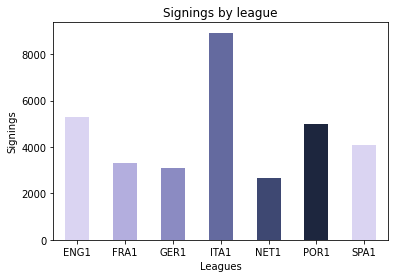

In [ ]:
# ISTOGRAMMA - numero acquisti per lega
df1 = df[df.league_team2.str.endswith("1")]
trasferimenti = df1.groupby(['league_team2']).transfer_value.size().plot(kind='bar',
                                                          color=sns.cubehelix_palette(start=2.8, rot=.1))
plt.title('Signings by league')
plt.xlabel('Leagues')
plt.ylabel('Signings')
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Signings values for league')

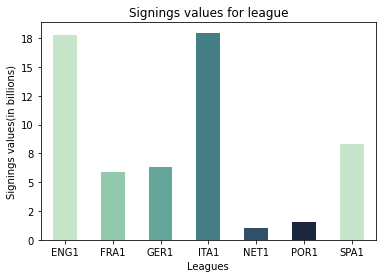

In [ ]:
#ISTOGRAMMA valore acquisti per lega
dataset = df[df.league_team2.str.endswith("1")]
fig, ax = plt.subplots()
df_filtered = dataset[(dataset['transfer_value'] != 'NF') & (df['transfer_value'] != '-')]
df_filtered = df_filtered.astype({'transfer_value': float },errors='raise')
valore_acquisti = df_filtered.groupby(["league_team2"]).transfer_value.sum().plot(kind="bar",ax=ax,color=sns.cubehelix_palette(rot=-.4))
scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
plt.xlabel('Leagues')
plt.ylabel('Signings values(in billions)')
plt.xticks(rotation=0)
plt.title('Signings values for league')

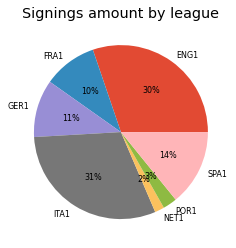

In [ ]:
#TORTA totale valore acquisti per lega (percentuale)
plt.style.use('ggplot')
df = df.reindex(sorted(df.columns), axis=1)
tot_transfer_value_team2 = df[df.league_team2.str.endswith("1")].transfer_value.sum()

df_filter2= df[df.league_team2.str.endswith("1")]
dff2 = df_filter2.groupby(["league_team2"]).transfer_value.sum().reset_index()

dff2.groupby(['league_team2']).sum().plot(kind='pie',
                                          autopct='%1.0f%%', subplots=True,
                                          legend=None,
                                          fontsize=8)

plt.title(label='Signings amount by league', y=1)
plt.ylabel(None)
plt.show()

season
2007    2626204999
2008    2446913999
2009    4268176999
2010    2966986000
2011    4295510000
2012    2646388000
2013    3735934999
2014    2927738000
2015    3709058000
2016    4291399999
2017    5776387999
2018    5332683000
2019    6755779000
2020    3988087999
2021    3111767000
Name: transfer_value, dtype: int64


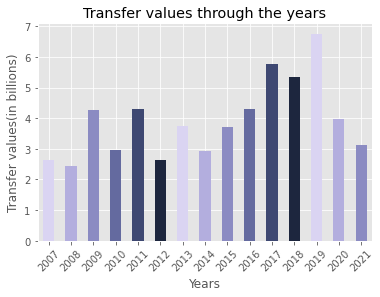

In [ ]:
#totale valore trasferimenti negli anni
df = df.reindex(sorted(df.columns), axis=1)
fig, ax = plt.subplots()
df_filter2= df[df.league_team2.str.endswith("1")]
dff2 = df_filter2.groupby(["season"]).transfer_value.sum().plot(kind='bar',
                                                               color=sns.cubehelix_palette(start=2.8, rot=.1))
dff3 = df_filter2.groupby(["season"]).transfer_value.sum()
print(dff3)
scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
plt.xlabel('Years')
plt.ylabel('Transfer values(in billions)')
plt.xticks(rotation=45)
plt.title('Transfer values through the years')

plt.show()

#**Primo punto**


In [ ]:
df = df.dropna()
url_df_serie = "https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_supportoCUT.csv"
df_serie = pd.read_csv(url_df_serie)


df = df.astype({'market_value': float },errors='raise')
first_quartile_market_value = df['market_value'].quantile(q=0.25)
print(first_quartile_market_value)

df_filtered = df[(df['country_team1'] == 'Italy') & (df['country_team2'] == 'Italy')]
#df_filtered = df_filtered[df_filtered['market_value'] >= first_quartile_market_value ]   #set this filtered to draw graph with filtered market_value 

G=nx.from_pandas_edgelist(df_filtered, "team1", "team2",create_using=nx.MultiDiGraph)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

print("G.nodes =", G.nodes)
#print("\n\nG.edges =", G.edges)
# print("\n\n\nG.degree =", G.degree)

# CHECK NODES MISSING IN dataset_supportCUT.csv
missing_teams = []
teams = df_serie.team1.tolist()
for node in G.nodes:
     if node not in teams:
         missing_teams.append(node)

for node in missing_teams:
    G.remove_node(node)


#COUNTING NUMBER OF EDGES BETWEEN ANY TWO NODES
edgelist = G.edges
dict_edges_occurences = {}

for edge in edgelist:
    if (edge[0], edge[1]) not in dict_edges_occurences:
        dict_edges_occurences[(edge[0], edge[1])] = 1
    dict_edges_occurences[(edge[0], edge[1])] += 1

print("Number of edges between any two nodes: ",  sorted(dict_edges_occurences.items(), key=lambda x: x[1], reverse=True))


200000.0
Number of nodes: 585
Number of edges: 12702
G.nodes = ['AS Roma', 'FC Inter', 'Cagliari Calcio', 'Chievo Verona', 'Ternana Calcio', 'Treviso FBC 1993', 'AS Cittadella', 'Calcio Lecco 1912', 'AC Arezzo', 'AC Pro Sesto', 'AS Pizzighettone', 'Calcio Portogruaro-Summaga', 'Spezia Calcio 1906', 'Torino FC', 'Palermo', 'US Lecce', 'Rimini FC', 'FC Rieti', 'AC Siena', 'Hellas Verona', 'AS Bari', 'Vicenza Calcio', 'Potenza Sport Club', 'US Grosseto FC', 'AC Pisa 1909', 'Cisco Roma', 'Modena FC', 'UC Sampdoria', 'AS Livorno', 'Val Di Sangro', 'Brescia Calcio', 'AC Milan', 'Genoa CFC', 'Bologna FC 1909', 'US Cremonese', 'Empoli FC', 'AC Monza Brianza', 'Atalanta BC', 'ACF Fiorentina', 'Piacenza FC', 'Juventus FC', 'Udinese Calcio', 'AC Cesena', 'Parma', 'Foligno Calcio', 'Calcio Catania', 'USD Olginatese', 'Pro Patria Gallaratese GB', 'Ravenna Calcio', 'Calcio Padova', 'Varese 1910', 'SSC Napoli', 'Delfino Pescara 1936', 'SS Virtus Lanciano', 'AC Ancona', 'Cavese 1919', 'ASD Calcio Pomi

In [ ]:
#Visualize the graph - node with the same color 
fig, ax = plt.subplots(figsize=(45, 35))
fig.suptitle("football player transfer from 2009 to 2021")

size_map = []
in_degrees = G.in_degree
degrees = G.degree
for i in G.nodes:
    for node in degrees:
        if node[0] == i:
            degree = node[1]
    size_map.append(degree * 15 )
    

pos = nx.kamada_kawai_layout(G)  
nx.draw(G, pos=pos, with_labels=False, node_color='lightblue', edge_color='lightgray')                        

draw_edges = nx.draw_networkx_edges(G,
                       pos=pos,
                       edgelist = dict_edges_occurences.keys(),
                       width=list(dict_edges_occurences.values()),
                       edge_color='lightgray',
                       alpha=0.6)
draw_labels = nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(G.nodes,G.nodes)),
                        font_color='black',
                        font_size=5)  # 7 per lo zoom

plt.axis('off')
plt.show()

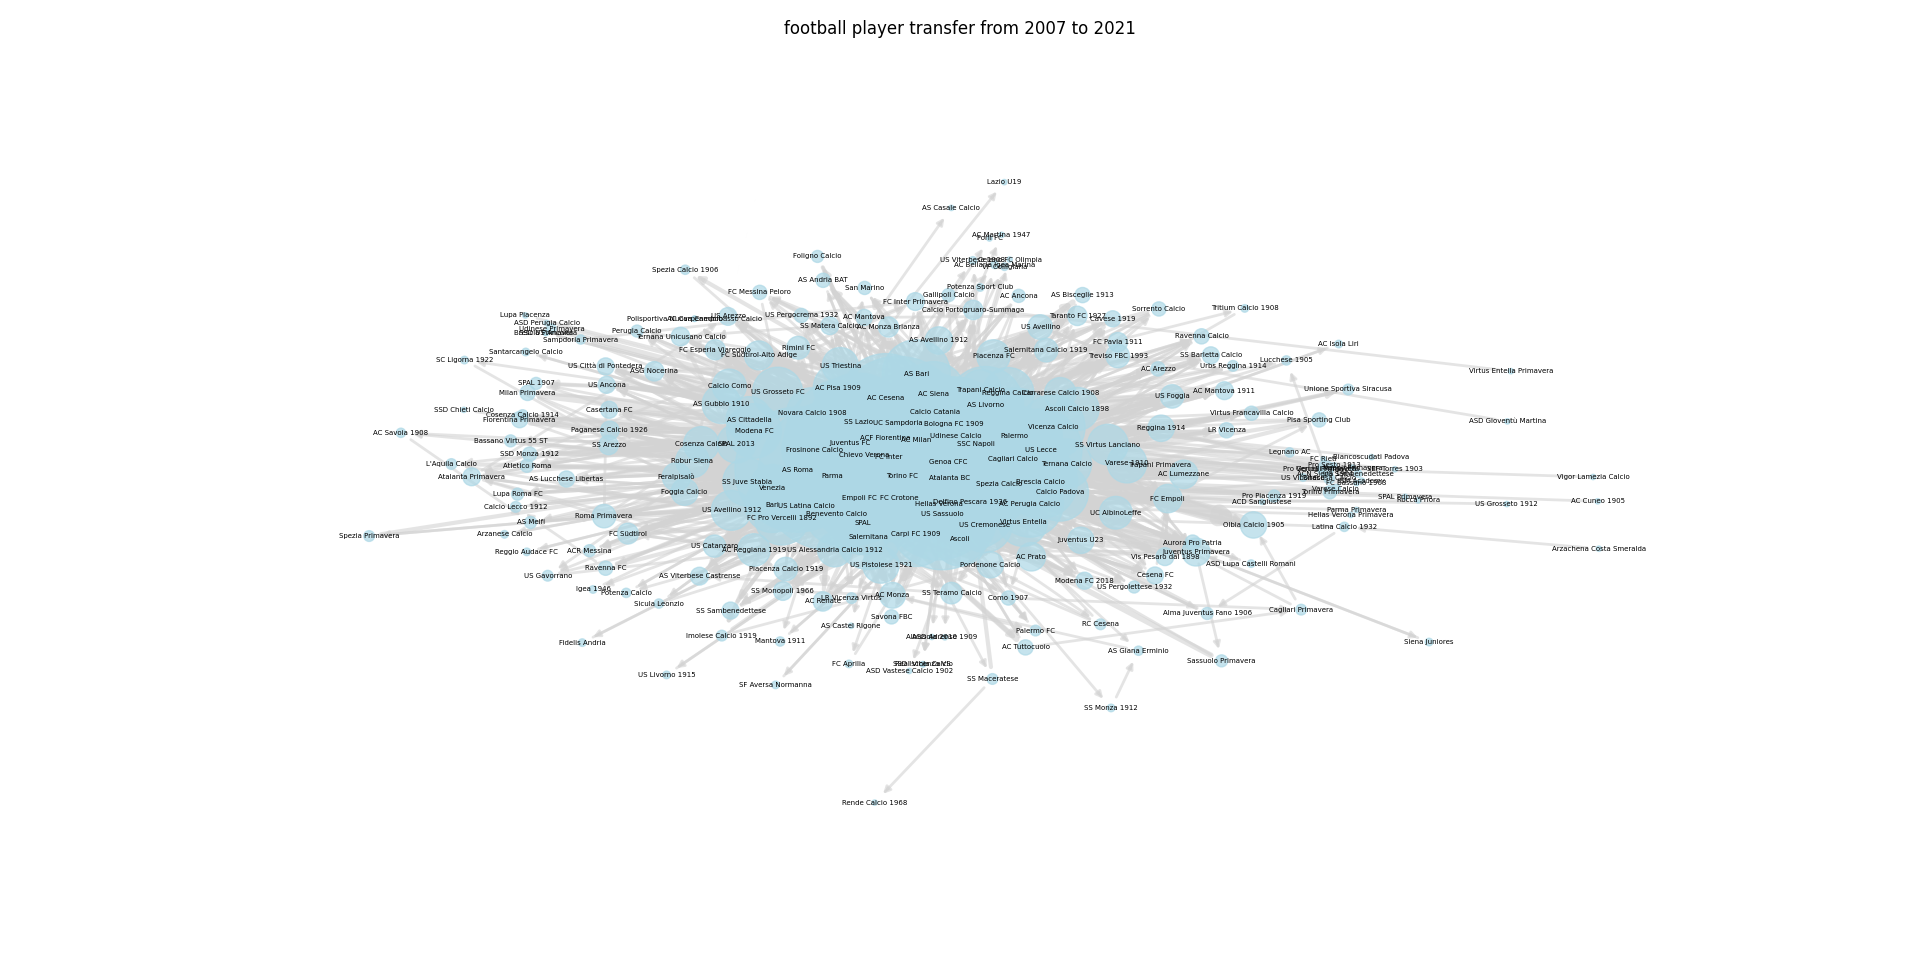

Il grafo plottato in questo modo, potrebbe sembrare apparentemente insignificante. Tuttavia, soffermandoci sui nomi delle squadre, ad occhio, abbiamo intuito potesse esserci una tendenza per la quale, le squadre posizionate nella parte centrale del grafo sono anche quelle che solitamente sono presenti in Serie A, mentre via via, allargandoci per cerchi concentrici si passa sempre di più verso le squadre di serie minori(B, C, D, Primavera).
Si è deciso dunque di colorare le squadre in base alla loro appartenenza ad una delle cinque serie italiane prese in considerazione, come di seguito mostrato .

In questa sezione verranno analizzate, con riferimento specifico al campionato italiano, quali sono le squadre che nel campionato italiano  più vengono coinvolte nella circolazione in entrata dei calciatori. Esiste una tendenza da parte della cerchia ristretta di top club a depredare le squadre di fasce più basse all’interno del medesimo campionato, è possibile individuare un accentramento di tutti gli acquisti rilevanti verso queste squadre? Quante sono? confronto con altri paesi


In [ ]:

#Visualize the graph with node colored based on league
fig, ax = plt.subplots(figsize=(45, 35))
fig.suptitle("football player transfer from 2007 to 2021")
color_map = []
size_map = []
in_degrees = G.in_degree
degrees = G.degree
for i in G.nodes:
    for node in degrees:
        if node[0] == i:
            degree = node[1]
    size_map.append(degree * 15 )
    for row in df_serie.itertuples():
        if row.team1 == i:
            if row.league_team1 == 'ITA1':
                color_map.append('cyan')
            elif row.league_team1 == 'ITA2':
                color_map.append('yellow')
            elif row.league_team1 == 'ITA3':
                color_map.append('green')
            elif row.league_team1 == 'ITA4':
                color_map.append('red')
            else:
                color_map.append('purple')


legend_elements1 = [Line2D([0], [0], marker='o', color='w', label='Serie A',markerfacecolor='cyan', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Serie B',markerfacecolor='yellow', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Serie C',markerfacecolor='green', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Serie D',markerfacecolor='red', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Primavera',markerfacecolor='purple', markersize=13)]

pos = nx.kamada_kawai_layout(G)  
nx.draw(G, pos=pos, with_labels=False, node_size=size_map, node_color=color_map)  

draw_edges = nx.draw_networkx_edges(G,
                       pos=pos,
                       edgelist = dict_edges_occurences.keys(),
                       width=list(dict_edges_occurences.values()),
                       edge_color='lightgray',
                       alpha=0.6)
draw_labels = nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(G.nodes,G.nodes)),
                        font_color='black',
                        font_size=10)  
ax.legend(handles=legend_elements1, loc='lower left', prop={'size': 8})
plt.show()

In questo primo grafo non è stato impostato nessun filtro nel market_value in modo tale che venissero prese in considerazione tutti trasferimenti. E' già  possibile notare come i club di Serie A, seppur si stiamo in prendendo in considerazione i trasferimenti di tutti i club di tutte le serie, occupano in maniera interessante una posizione centralissima. Di conseguenza è possibile supporre che questi tendano a manovrare con le proprie operazioni i passaggi anche di gran parte dei giocatori che si muovono nelle serie inferiori. Man mano che invece ci si sposta verso la periferia del grafo (verso i cerchi concentrici più esterni e quindi verso le squadre prima di Serie B, poi di Serie C, e infine di Serie D e primavera) questo “potere” va scemando.
Tutto ciò potrebbe essere collegato alla strategia, da parte dei club italiani di volersi accaparrare i giocatori a basso valore quando promettenti, e quindi ad acquistarne il cartellino, per poi farli crescere attraverso continui prestiti degli stessi giocatori verso le serie minori, senza che questi, in molti casi, arrivino poi a giocare veramente con il club che sulla carta ne detiene il cartellino.
Di seguito verrà mostrato un secondo grafo in cui è stato impostato un filtro nel market_value pari al primo quartile della distribuzione della colonna market_value. 

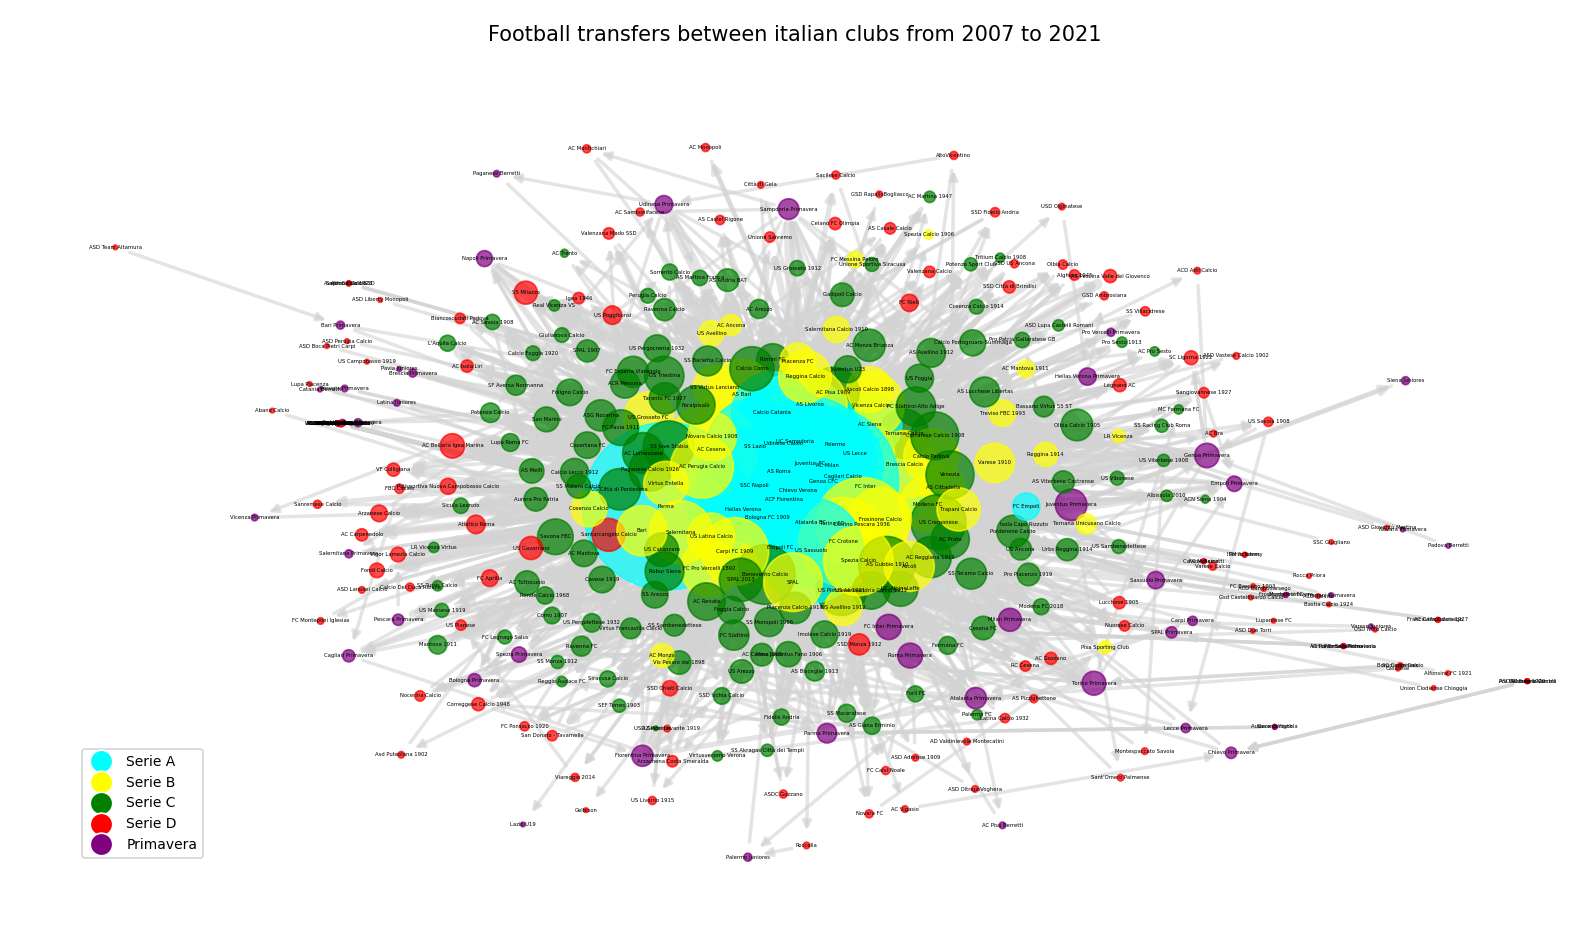

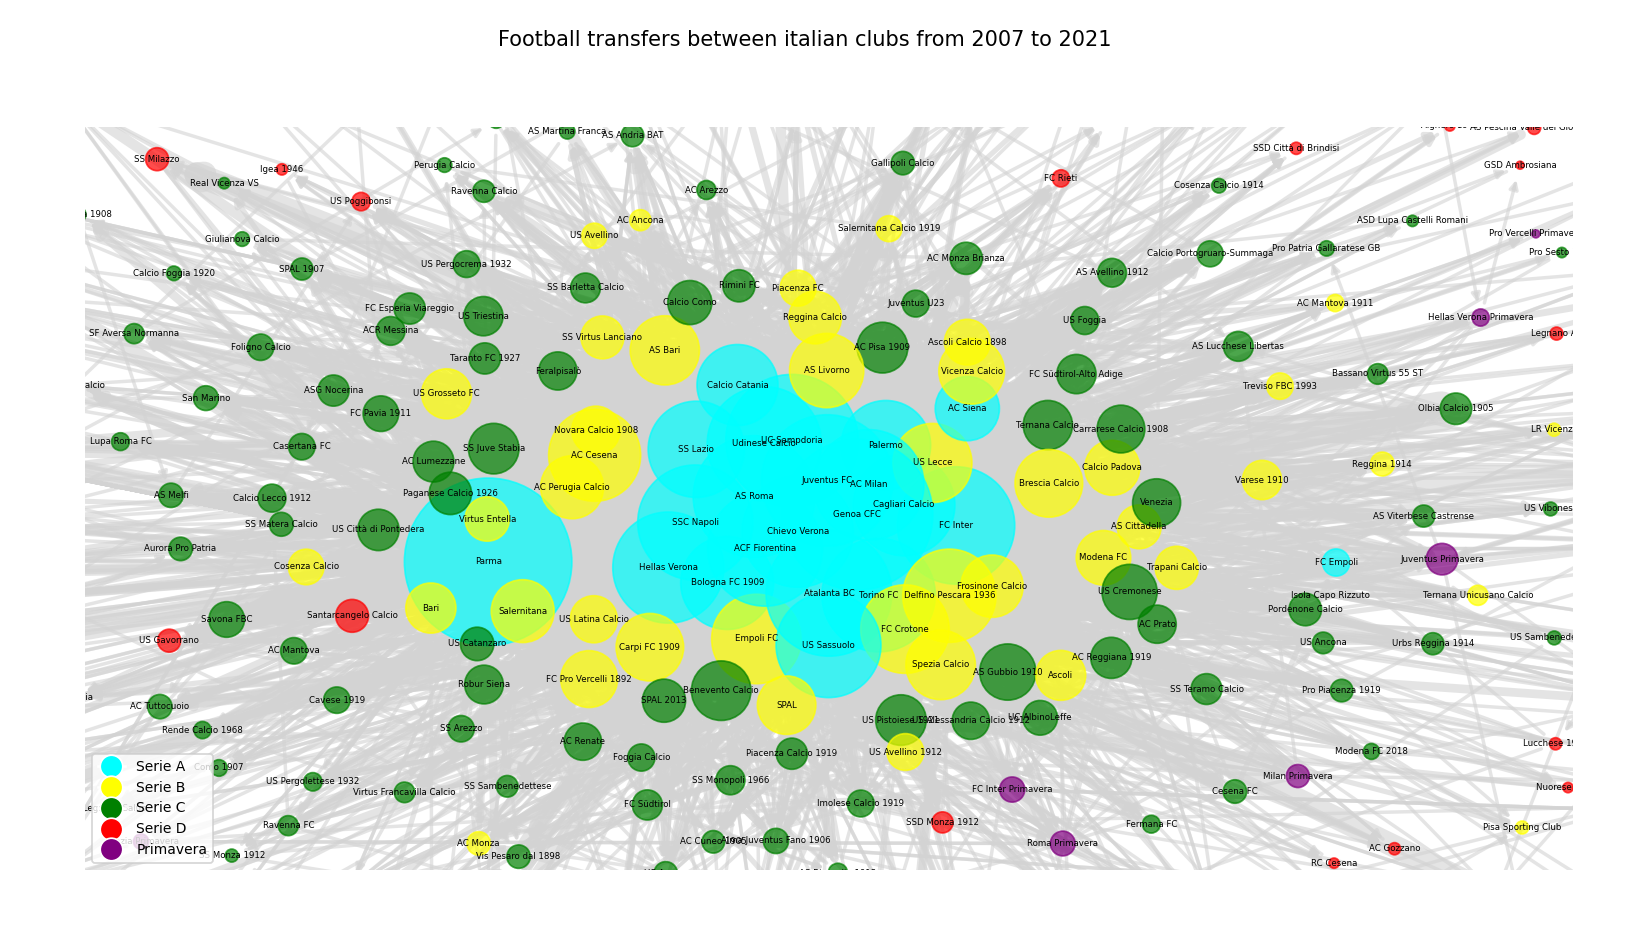

Con l'impostazione del filtro si può maggiormente notare che le squadre delle serie maggiori aumentano di dimensione ad evidenziare il loro maggiore potere di acquisto; al contrario le squadre di serie D e Primavera rimangono più esterne e con grandezza del nodi molto ridotta rispetto alle squadre delle serie superiori. 
In entrambi i grafi è stato utilizzato il kamada_Kaway layout il quale fa si che i nodi che occupano una posizione centrale nel grafo sono quei nodi che sono direttamente collegati, o meglio adiacenti, con la maggior parte degli altri nodi.


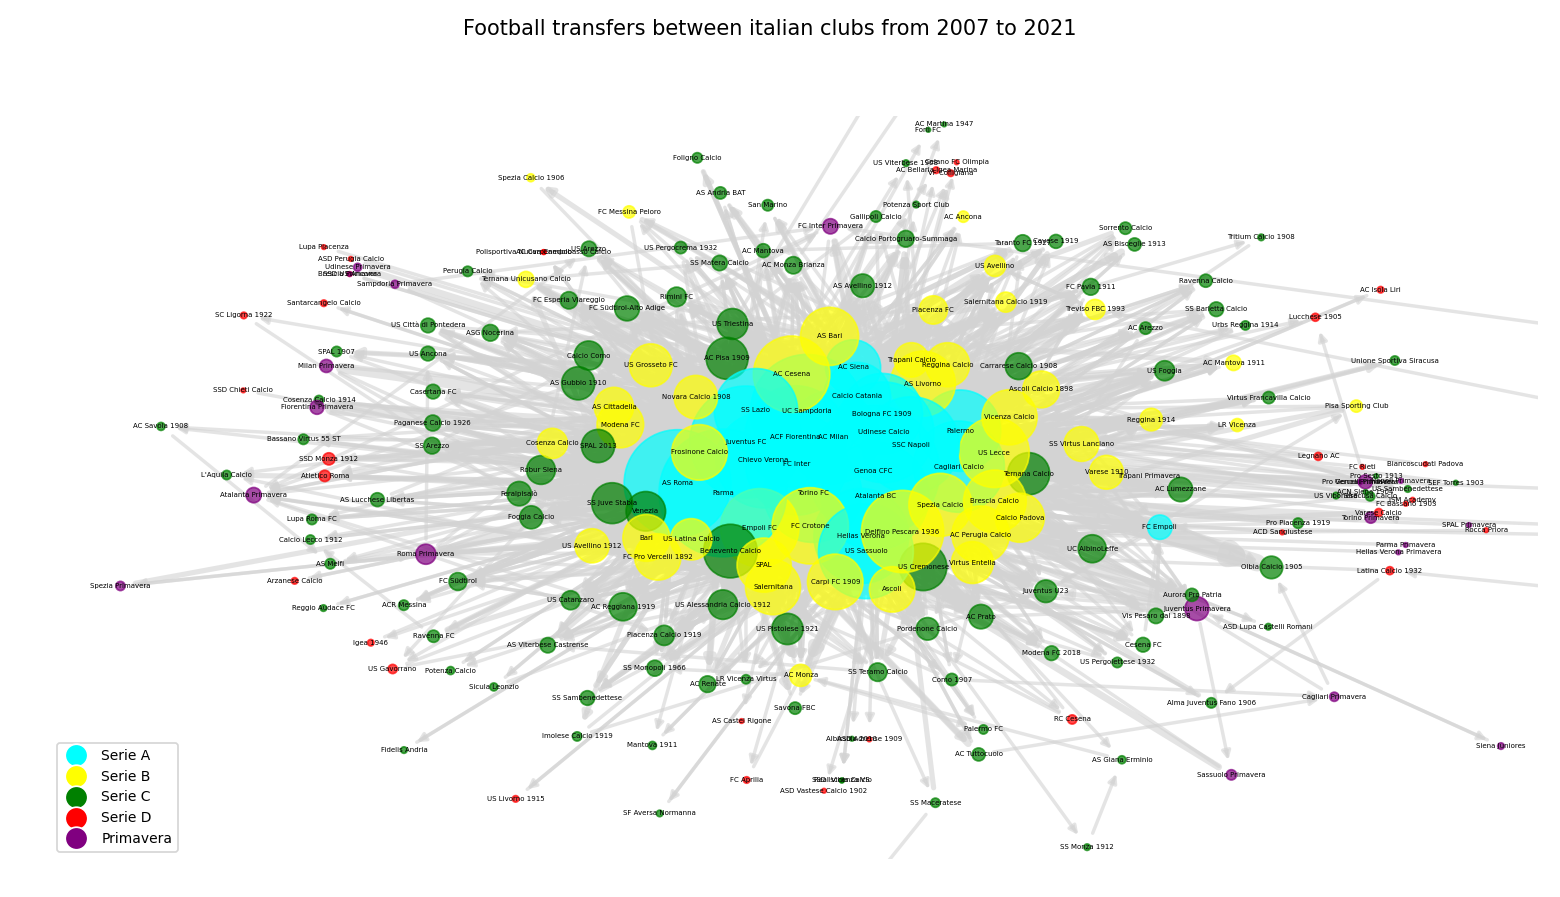

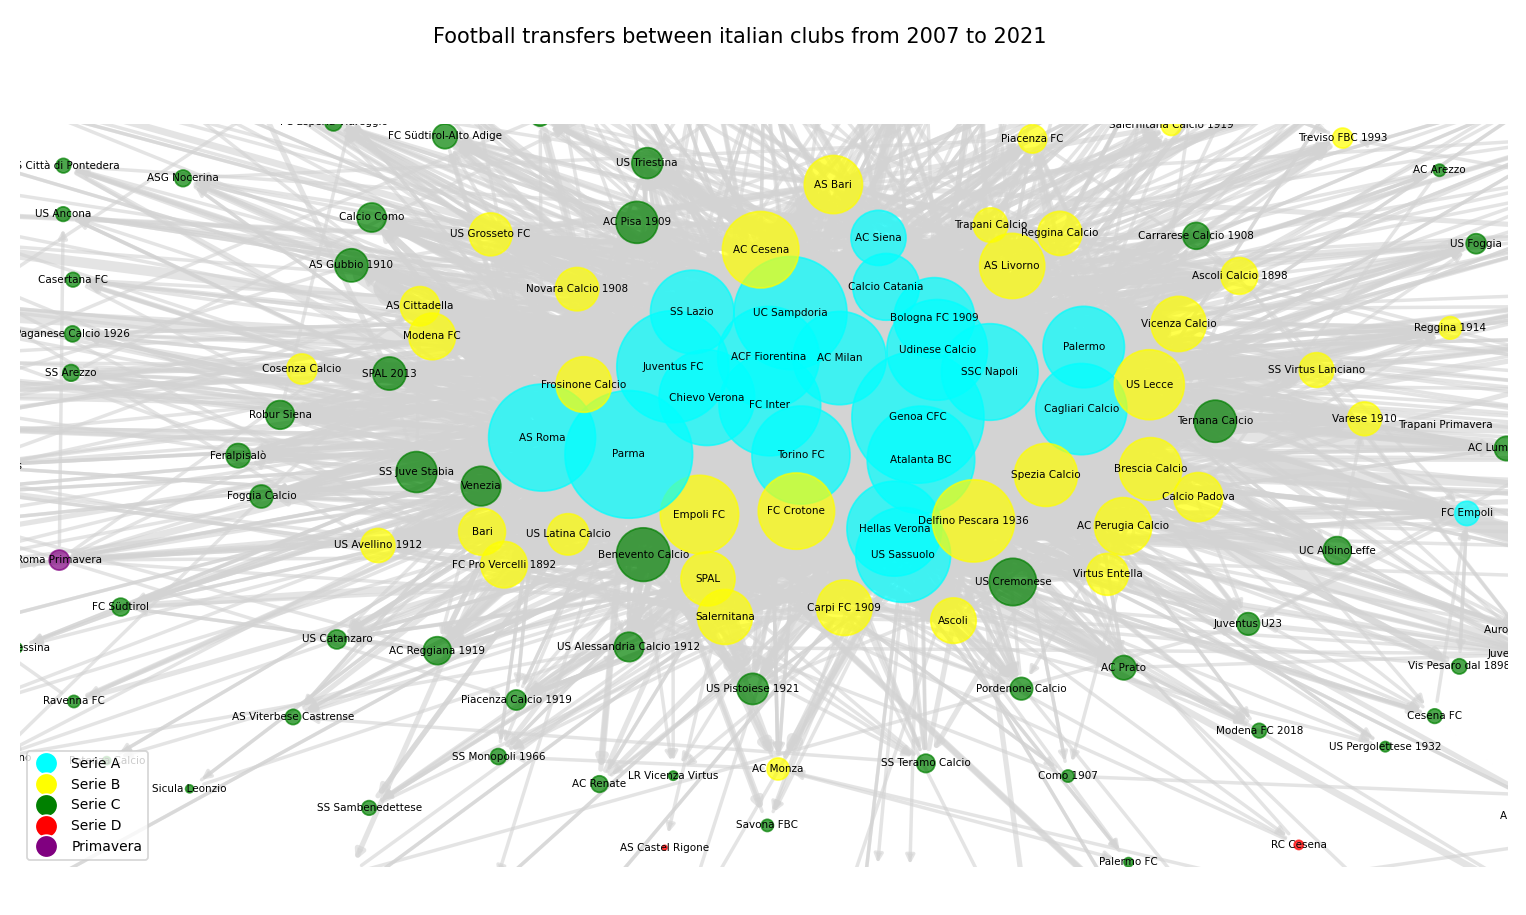

Di seguito verrà presentato un diagramma a barre che evidenzia le 10 squadre con la degree più alta.

[('Parma', 1329), ('Genoa CFC', 1079), ('UC Sampdoria', 833), ('Juventus FC', 818), ('Atalanta BC', 750), ('AS Roma', 705), ('FC Inter', 653), ('SSC Napoli', 629), ('ACF Fiorentina', 626), ('Udinese Calcio', 619)]


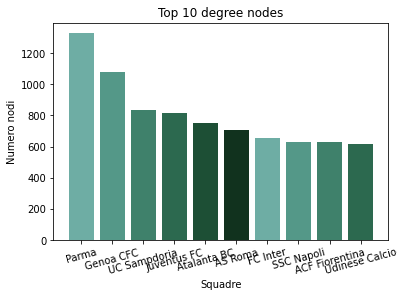

In [ ]:
#TOP 10 IN-DEGREE NODES
degrees_dict = {}
for t in degrees:
    degrees_dict[t[0]] = t[1]

degrees_list = sorted(degrees_dict.items(), key=lambda x: x[1], reverse=True)

top10_degree_nodes = degrees_list[:10]

print(top10_degree_nodes)

import matplotlib.pyplot as plt
import seaborn as sns


data =  top10_degree_nodes

plt.bar(*zip(*data), color=sns.color_palette("ch:2,r=.2,l=.6"))
plt.title('Top 10 degree nodes')
plt.xlabel('Squadre')
plt.ylabel('Numero nodi')
plt.xticks(rotation=15)
plt.show()

Vediamo come i 10 club con la più alta degree, appartengano tutti alla Serie A, confermando quando detto sopra e quanto già visibile con il grafo, ovvero che sono le squadre della serie A che avendo più potere d'acquisto tendono ad accentrare verso di loro la maggior parte dei trasferimenti dei calciatori delle squadre italiane.

Arrivati a questo punto è interessante, con il medesimo grafo visto finora, andare ad innalzare via via la soglia del market value. Questo permette di verificare se esiste una sorta di oligarchia che porta una cerchia molto ristretta di squadre ad accentrare verso di se l’acquisto dei migliori giocatori ‘depredando’ le squadre di fascia bassa, o al contrario c’è una distribuzione più equilibrata negli acquisti dei giocatori con un valore rilevante.
Le soglie utilizzate sono rispettivamente 20, 25 e 30 milioni. 

In [ ]:

df_filtered = df_filtered[df_filtered['market_value'] >= 20000000.0 ] #set on 20mln, 25mln, 30mln

G=nx.from_pandas_edgelist(df_filtered, "team1", "team2",create_using=nx.MultiDiGraph)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

print("G.nodes =", G.nodes)
#print("\n\nG.edges =", G.edges)
# print("\n\n\nG.degree =", G.degree)


#COUNTING NUMBER OF EDGES BETWEEN ANY TWO NODES
edgelist = G.edges
dict_edges_occurences = {}

for edge in edgelist:
    if (edge[0], edge[1]) not in dict_edges_occurences:
        dict_edges_occurences[(edge[0], edge[1])] = 1
    dict_edges_occurences[(edge[0], edge[1])] += 1

#print("Number of edges between any two nodes: ",  sorted(dict_edges_occurences.items(), key=lambda x: x[1], reverse=True))


#Visualize the graph
fig, ax = plt.subplots(figsize=(45, 35))
fig.suptitle("Football transfers between italian clubs from 2007 to 2021 with filtered market value")

size_map = []
in_degrees = G.in_degree
for i in G.nodes:
    for node in in_degrees:
        if node[0] == i:
            in_degree = node[1]
    size_map.append(in_degree * 30)


pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=False, node_size=size_map, node_color='blue')  

draw_edges = nx.draw_networkx_edges(G,
                       pos=pos,
                       edgelist = dict_edges_occurences.keys(),
                       width=list(dict_edges_occurences.values()),
                       edge_color='lightgray',
                       alpha=0.6)
draw_labels = nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(G.nodes,G.nodes)),
                        font_color='black',
                        font_size=10)

plt.axis('off')
plt.show()

**Football player transfer from 2007 to 2021 with filter market value (20 mln)**

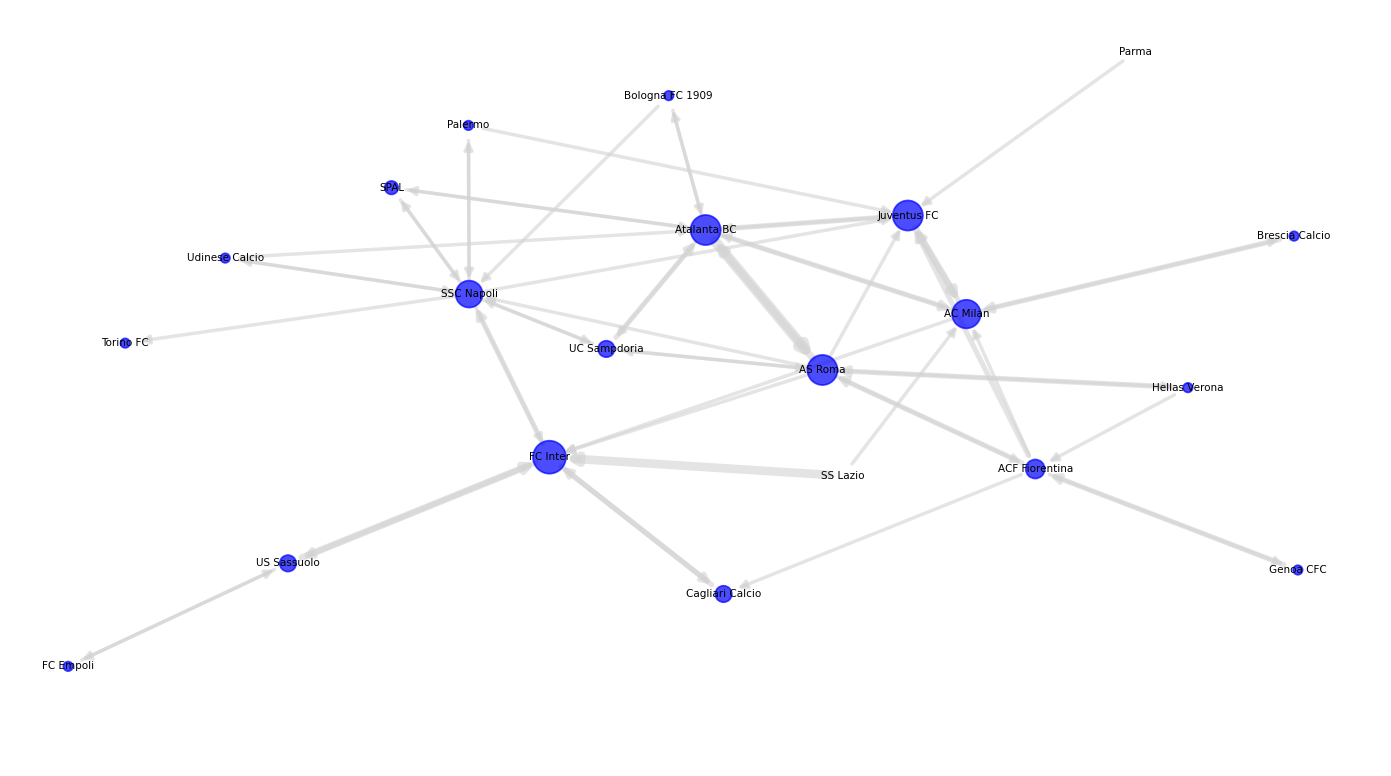

**Football player transfer from 2007 to 2021 with filter market value (25 mln)**

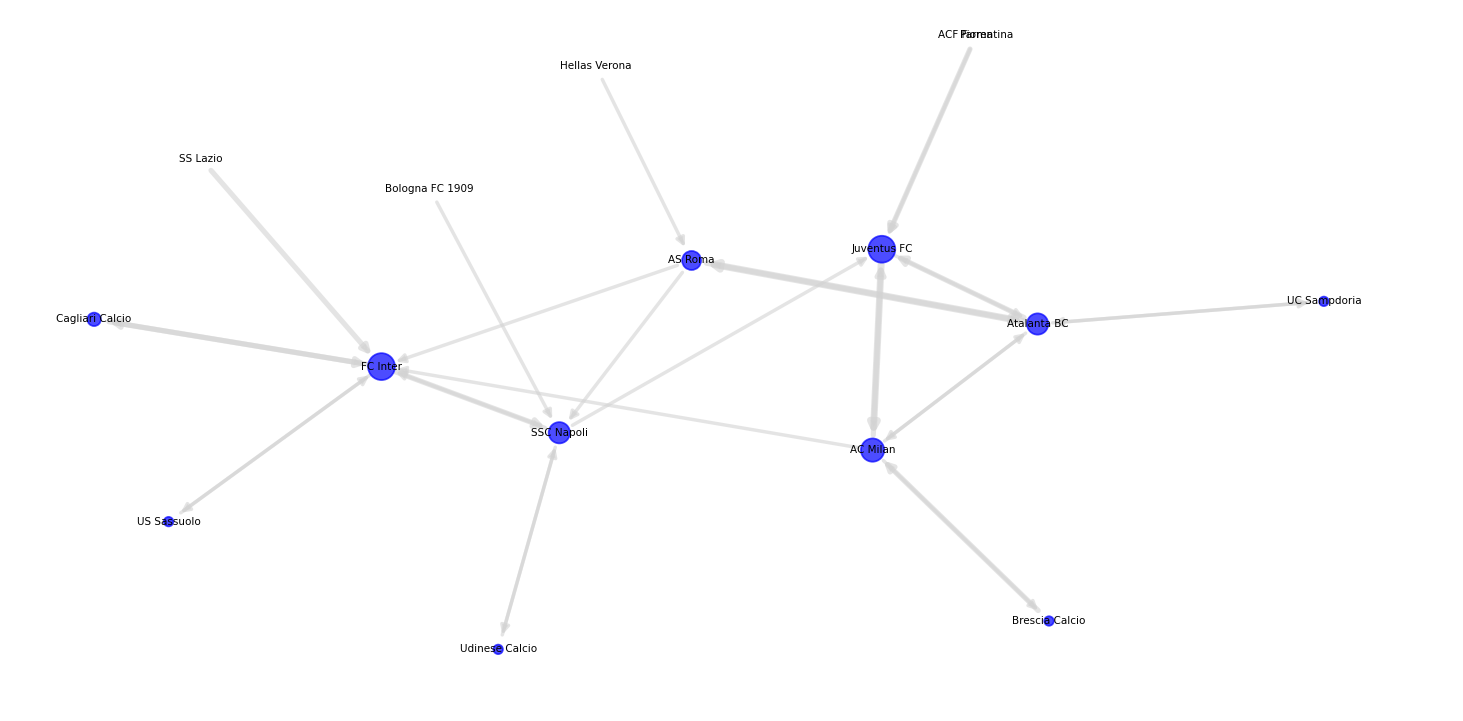

**Football player transfer from 2007 to 2021 with filter market value (30 mln)**

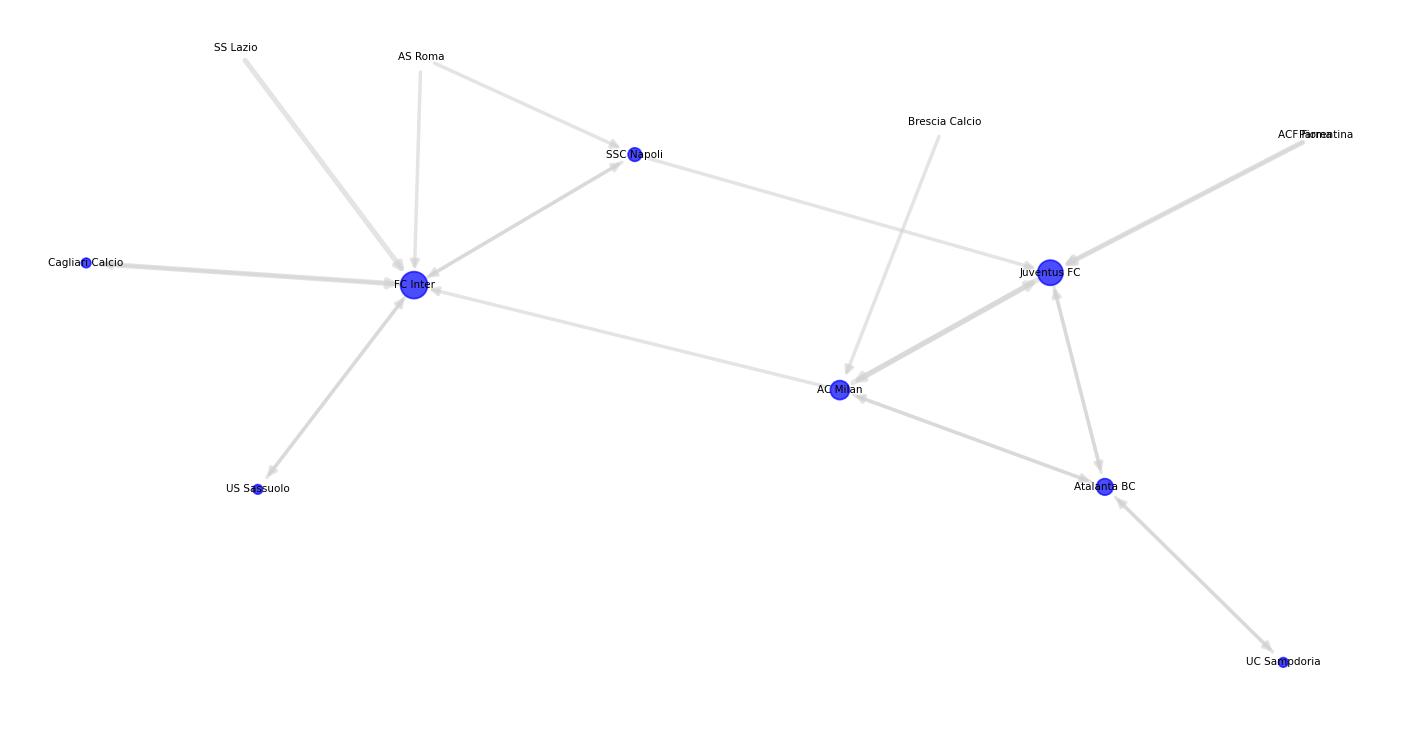

Di seguito si propongono 3 versioni del grafo son soglia 20 milioni però con i campionati Inglese, Spagnolo e Tedesco. 

In [ ]:

df_filtered = df[(df['country_team1'] == 'England') & (df['country_team2'] == 'England')] #set with England, Spain, Germany
df_filtered = df_filtered[df_filtered['market_value'] >= 20000000.0 ]

G=nx.from_pandas_edgelist(df_filtered, "team1", "team2",create_using=nx.MultiDiGraph)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

print("G.nodes =", G.nodes)
#print("\n\nG.edges =", G.edges)
# print("\n\n\nG.degree =", G.degree)


#COUNTING NUMBER OF EDGES BETWEEN ANY TWO NODES
edgelist = G.edges
dict_edges_occurences = {}

for edge in edgelist:
    if (edge[0], edge[1]) not in dict_edges_occurences:
        dict_edges_occurences[(edge[0], edge[1])] = 1
    dict_edges_occurences[(edge[0], edge[1])] += 1

#print("Number of edges between any two nodes: ",  sorted(dict_edges_occurences.items(), key=lambda x: x[1], reverse=True))


#Visualize the graph
fig, ax = plt.subplots(figsize=(45, 35))
fig.suptitle("football player transfer from 2007 to 2021 with filtered market value")

size_map = []
in_degrees = G.in_degree
for i in G.nodes:
    for node in in_degrees:
        if node[0] == i:
            in_degree = node[1]
    size_map.append(in_degree * 30)


pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_nodes(G,pos,
                       nodelist=G.nodes,
                       node_size=size_map,
                       node_color='blue',
                       alpha=0.7)
nx.draw_networkx_edges(G,
                       pos=pos,
                       edgelist = dict_edges_occurences.keys(),
                       width=list(dict_edges_occurences.values()),
                       edge_color='lightgray',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(G.nodes,G.nodes)),
                        font_color='black',
                        font_size=10)

plt.axis('off')
plt.show()

**England League**

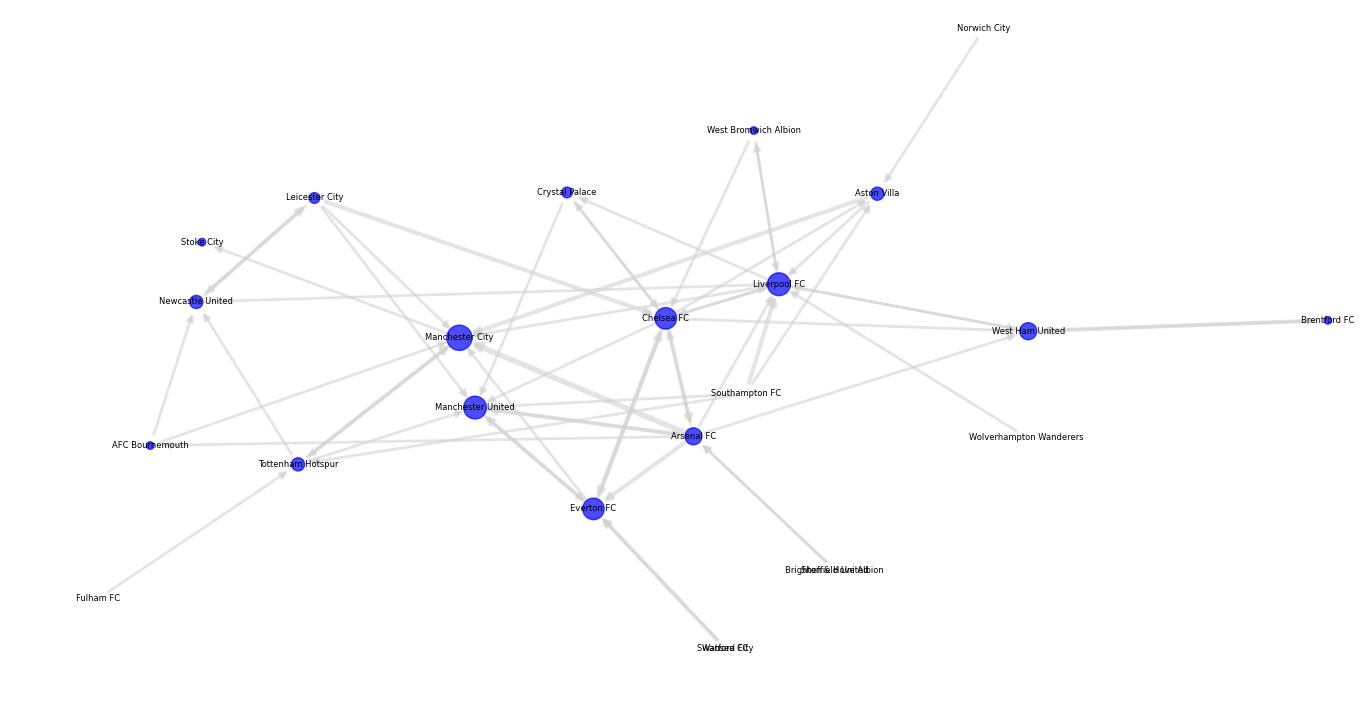

In Inghilterra la situazione è più o meno simile all’Italia. Le squadre ‘predatrici’ sono sempre sei, ovvero Manchester United, Manchester City, Everton, Chelsea, Arsenal, Liverpool. 
La situazione è simile nonostante in Inghilterra, come visto nella panoramica, si tendano a fare acquisti più costosi. La spiegazione potrebbe essere legata al fatto che, più che saccheggiare le squadre del proprio campionato, i club inglesi tendano ad acquistare i calciatori di valore dai campionati esteri.

**Spain League**

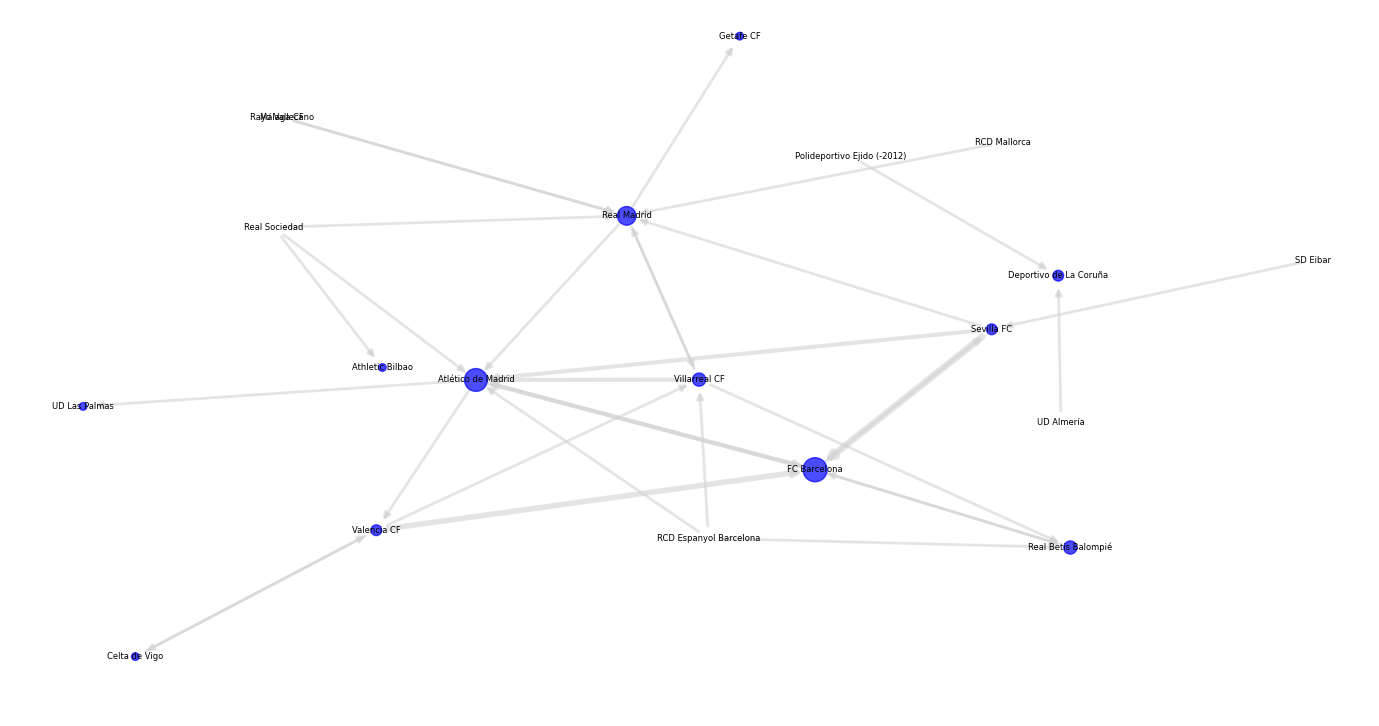

**German League**

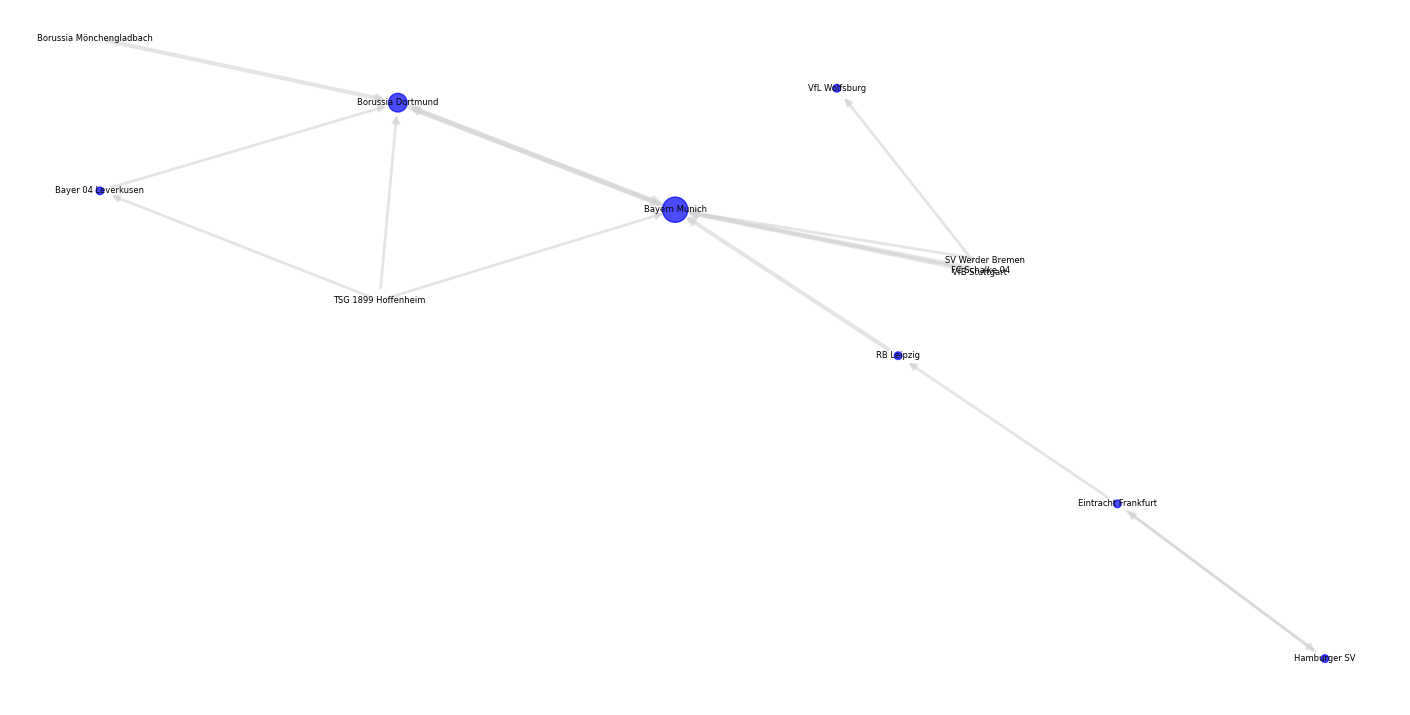

In Spagna e Germania c’è invece una cerchia molto più ristretta di squadre che tendono a depredare le proprie connazionali. In particolare il campionato tedesco è praticamente un duopolio tra Bayern Monaco e Borussia Dortmund.

# **Secondo punto**

Il secondo obiettivo del lavoro è di andare a verificare se è possibile individuare all’interno della Serie A delle alleanze tra squadre, ovvero coppie o gruppi di squadre che tendono a creare nel tempo reti di scambi ricorrenti particolarmente fitte tra loro.
Per fare questo cercheremo di individuare e di separare nel nostro grafo le varie comunità di squadre, rientrando quindi nell’ambito della cosiddetta community detection.
Nel nostro lavoro abbiamo operato con due algoritmi di community detection: il Girvan-Newman algorithm, che fa parte degli algoritmi di hierarchical community detection, ed il Greedy modularity algorithm, che fa parte degli algoritmi della modularity-based community detection.
L’algoritmo Girvan-Newman è stato il primo ad essere utilizzato, ma non ha fornito risultati soddisfacenti, come mostrato di seguito. 


In [ ]:
df = pd.read_csv(url_df_main)
df_filtered = df[(df['league_team1'] == 'ITA1') & (df['league_team2'] == 'ITA1')]
df_filtered= df_filtered[(df_filtered['season']>2009)&(df_filtered['season']<2021)]
df_filtered = df_filtered[df_filtered['market_value'] >= 10000000]

#CREATE GRAPH
G=nx.from_pandas_edgelist(df_filtered, "team1", "team2",create_using=nx.MultiDiGraph)
#print("Number of nodes:", G.number_of_nodes())
#print("Number of edges:", G.number_of_edges())

# print("G.nodes =", G.nodes)
print("\n\nG.edges =", G.edges)
# print("\n\n\nG.degree =", G.degree)

#COUNTING NUMBER OF EDGES BETWEEN ANY TWO NODES
edgelist = G.edges
dict_edges_occurences = {}

for edge in edgelist:
    if (edge[0], edge[1]) not in dict_edges_occurences:
        dict_edges_occurences[(edge[0], edge[1])] = 1
    dict_edges_occurences[(edge[0], edge[1])] += 1

def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, e in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w, e]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w, e]['community'] = 0


def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 13
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

##COMMUNITY DETECTION WITH GIRVAN NEWMAN
k = 4
comp = nxcom.girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

communities = next(comp)
print(len(communities))

edges = [(v, w) for v, w, z in G.edges]


#Node size
size_map = []
in_degrees = G.in_degree
print('\n\n IN degree:',in_degrees)
for i in G.nodes:
    for node in in_degrees:
        if node[0] == i:
            in_degree = node[1]
    size_map.append(in_degree * 60+ 60)

# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w, e in G.edges if G.edges[v, w, e]['community'] == 0]
internal = [(v, w) for v, w, e in G.edges if G.edges[v, w, e]['community'] > 0]
internal_color = ['black' for e in internal]


pos = nx.kamada_kawai_layout(G)
fig, ax = plt.subplots(figsize=(45, 35))
plt.suptitle("Communities with Girvan Newman")
# Draw external edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    node_size=size_map,
    edgelist=internal,
    edge_color=internal_color)

plt.axis('off')
plt.show()

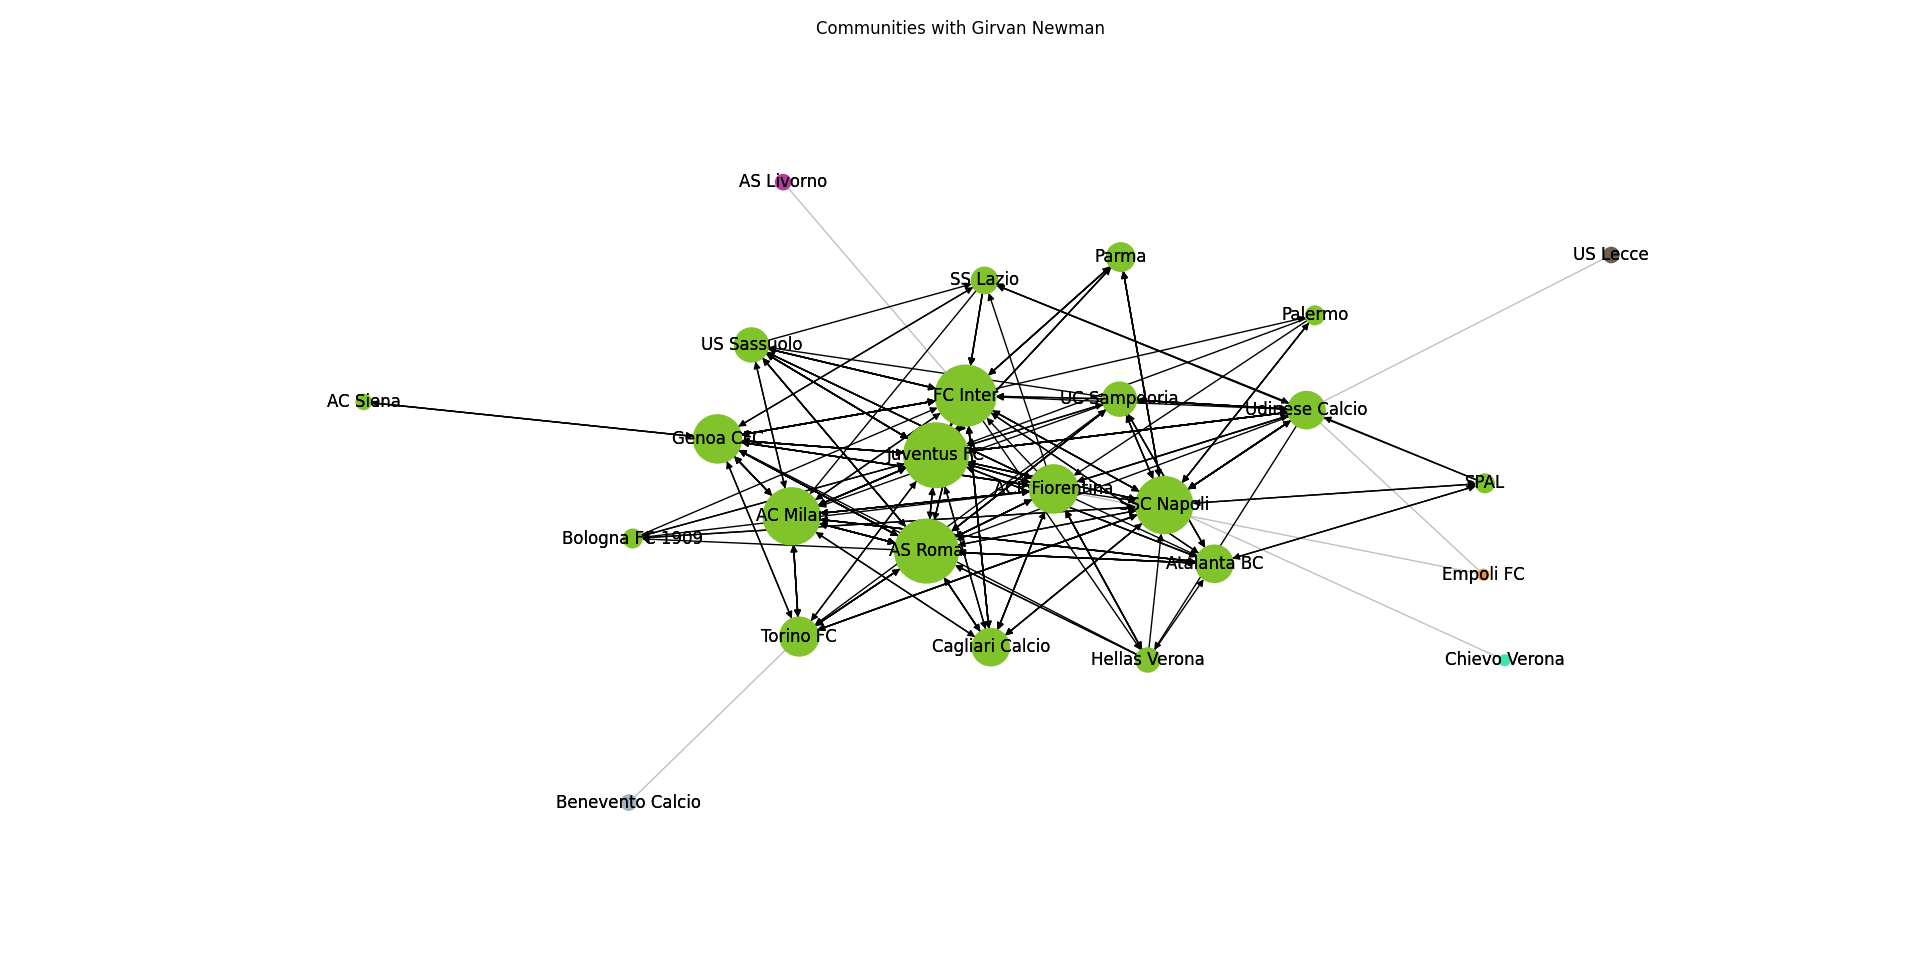


Di conseguenza abbiamo optato per il Greedy modularità algorithm, di cui riporteremo gli output ottenuti.


In [ ]:
##COMMUNITY DETECTION WITH GREEDY MODULARITY
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
#Count the communities
print(f"The Serie A has {len(communities)} communities.")


edges = [(v, w) for v, w, z in G.edges]

#Node size
size_map = []
in_degrees = G.in_degree
print('\n\n IN degree:',in_degrees)
for i in G.nodes:
    for node in in_degrees:
        if node[0] == i:
            in_degree = node[1]
    size_map.append(in_degree * 60+ 60)

# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w, e in G.edges if G.edges[v, w, e]['community'] == 0]
internal = [(v, w) for v, w, e in G.edges if G.edges[v, w, e]['community'] > 0]
internal_color = ['black' for e in internal]


pos = nx.kamada_kawai_layout(G)
fig, ax = plt.subplots(figsize=(45, 35))
plt.suptitle("Communities with Modularity")
# Draw external edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    node_size=size_map,
    edgelist=internal,
    edge_color=internal_color)

plt.axis('off')
plt.show()

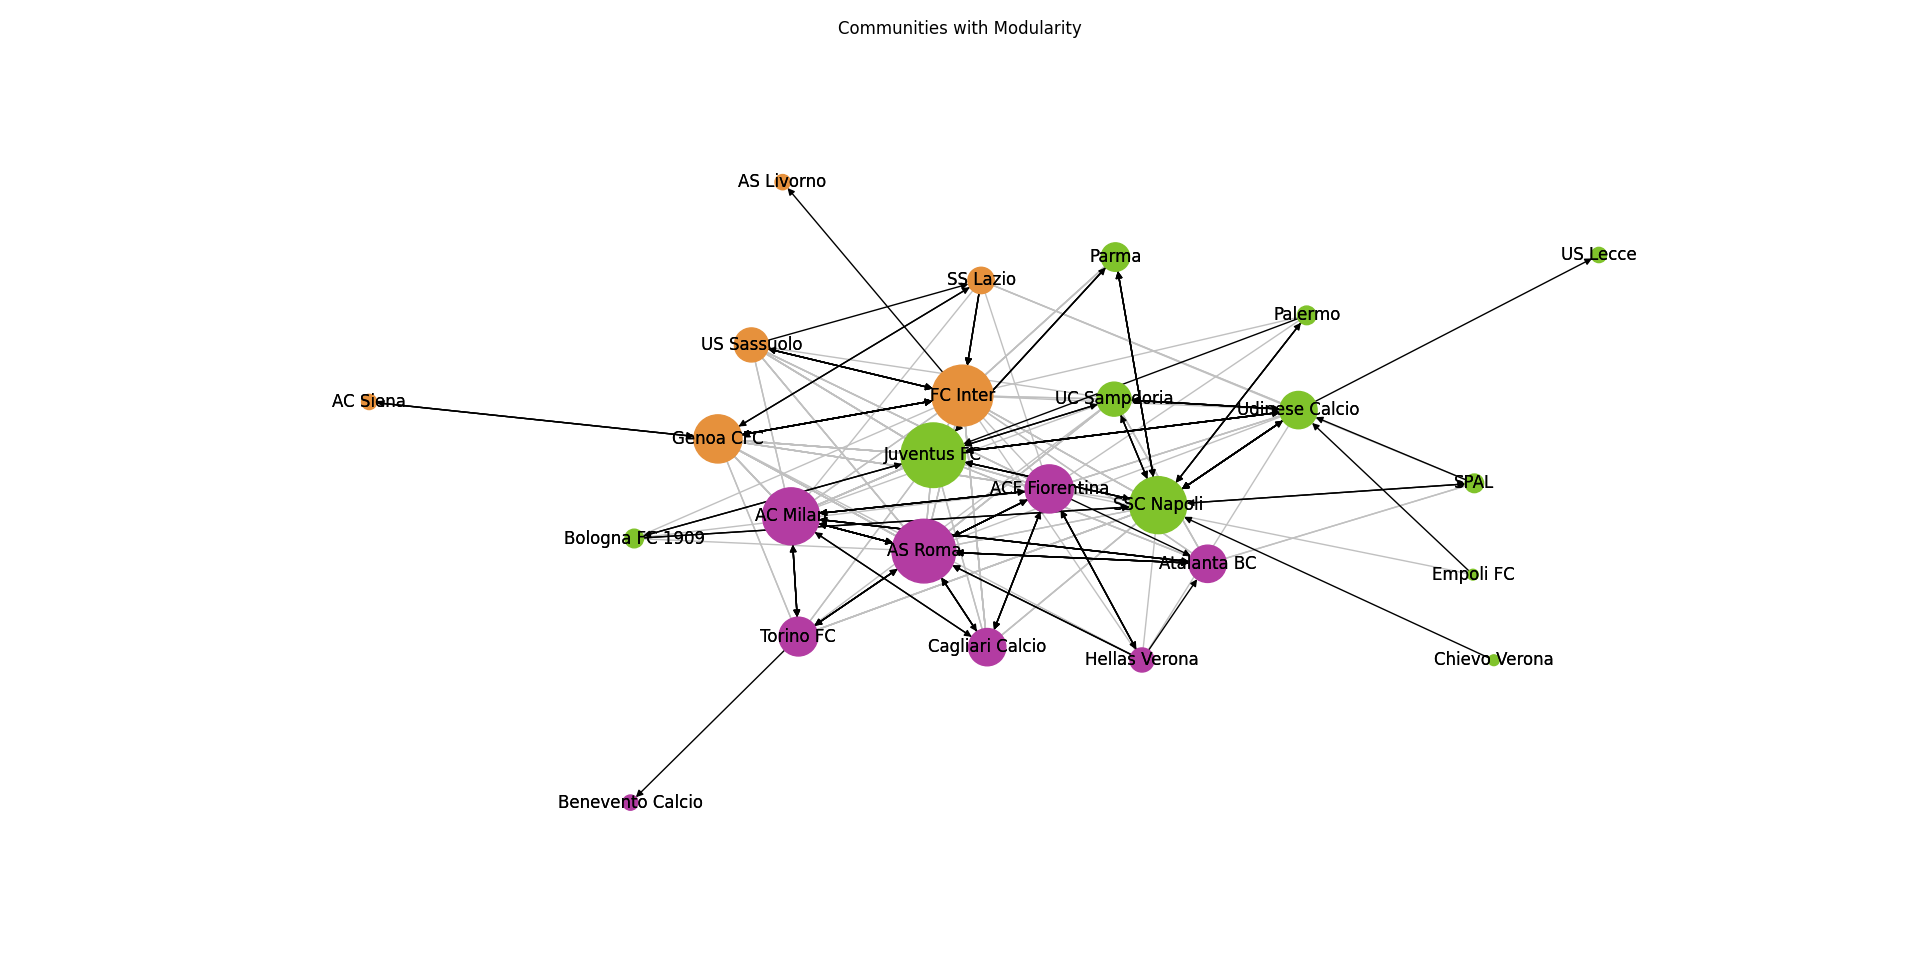

Si può vedere come l’algoritmo greedy modularity di community detection individui tre comunità distinte di squadre e i seguenti aspetti interessanti:

1)Le tre storiche big ed eterne rivali del calcio italiano, ovvero Juventus, Inter, e Milan, appartengono ciascuna a una comunità diversa.

2)Nel grafo abbiamo deciso di mettere in evidenza le squadre con maggiori acquisti, di conseguenza la grandezza dei nodi è proporzionale all’in-degree. Possiamo notare che in ciascuna delle 3 comunità, sono proprio Juventus, Inter e Milan a farla da padrone. Il Milan in realtà si contende l’egemonia con la Roma, anch’essa tra le squadre più blasonate del panorama italiano.

3)Nel calcio italiano professionistico esistono 5 derby, ovvero cinque casi di squadre che appartengono alla stessa città; nel grafo per ognuno di questi derby le squadre si trovano, in tutti e cinque i casi, in fazioni (comunità) opposte.

# **Terzo punto**

Il terzo obiettivo è quello di rispondere al seguente quesito: quale percorso deve fare, in Italia, un calciatore per emergere dalle serie minori (Primavera, Serie D, Serie C) ed arrivare alla Serie A? Nel rispondere a questo quesito andremo a verificare quanto sia tortuosa la strada in termini di squadre/leghe da attraversare prima di arrivare a destinazione, e quali sono le squadre che più fanno da ‘ponte’ nel raggiungimento del traguardo.
Per poter ottenere i grafi, abbiamo apportato alcune modifiche al dataset in modo che i dati presi in considerazione per l’analisi rispettassero 4 condizioni che di seguito vengono elencate. Le 4 condizioni sono descritte prendendo come esempio l’analisi del percorso dei giocatori che partono dalla Serie D, ma la stessa analisi verrà ripetuta con Serie C e Campionato Primavera:

1)PRIMA CONDIZIONE: vengono presi in considerazione soltanto i giocatori il cui primo trasferimento, in ordine temporale nel dataset, ha come lega di partenza la Serie D (o C e Primavera a seconda di quale delle tre analisi stiamo considerando).

2)SECONDA CONDIZIONE: dopo la scrematura della PRIMA CONDIZIONE vengono presi in considerazione soltanto quei giocatori che almeno una volta nella loro carriera arrivano in Serie A.

3)TERZA CONDIZIONE: una volta che il calciatore arriva in Serie A, tutti i trasferimenti che in ordine temporale sono successivi al suo approdo in Serie A non vengono più presi in considerazione.

4)QUARTA CONDIZIONE: l’approdo di un calciatore in Serie A viene considerato ‘valido’ soltanto se il calciatore permane in Serie A per almeno una stagione e mezzo, senza che questi venga immediatamente riceduto verso le serie minori. Di conseguenza, se entro la stagione e mezzo il calciatore ritorna in una serie inferiore, la TERZA CONDIZIONE viene annullata e si proseguirà nel tenere in considerazione i trasferimenti successivi.

Una volta modificato il dataset in base alle esigenze di analisi, per rispondere alle nostre domande, abbiamo deciso di dividere l’analisi in due parti:
una parte in cui operiamo a **livello macro**, nella quale per ogni trasferimento prendiamo in considerazione la lega di partenza e la lega di arrivo. In questo caso il grafo sarà composto da 6 nodi ovvero il nodo Primavera, il nodo Serie D, il nodo Serie C, il nodo Serie B, il nodo Serie A, ed il nodo Estere che raggruppa i trasferimenti verso leghe estere. Ogni nodo accorpa al suo interno tutte le squadre che appartengono alla specifica lega rappresentata da quel nodo.
Una parte in cui operiamo a **livello micro** nella quale per ogni trasferimento prendiamo in considerazione la specifica squadra di partenza e di arrivo.

Di seguito il codice e i grafi rappresentanti la nostra analisi a livello macro.

In [ ]:
#TERZA DOMANDA DATASET 
url2 = 'https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_pulito07-21.csv'
df_terza_domanda = pd.read_csv(url2)


new_df=df_terza_domanda.groupby('player_name').first().reset_index()
new_df2=new_df[new_df['league_team1']=='ITA4']  # set ITA3 and ITAJ to get Serie C and Primavera Analysis 
player_list=new_df2['player_name'].tolist()
dataframe=df_terza_domanda[df_terza_domanda['player_name'].isin(player_list)]
new_dataframe=dataframe[dataframe['league_team2']=='ITA1']
player_list2=list(set(new_dataframe['player_name'].tolist()))

data=dataframe[dataframe['player_name'].isin(player_list2)]
esclusi=[]
salvati=[]
righe=list(range(0,len((data.index))))
data['indice']=righe
for player in player_list2:
    for row in data.itertuples():
        if row.player_name==player:
            for row2 in data.itertuples():
                if ((row2.season == row.season or row2.season==row.season+1) and row2.league_team2!='ITA1' and row2.player_name==player and row2.indice!=row.indice):
                    for row3 in data.itertuples():
                        if (row3.indice!=row2.indice and row3.indice!=row.indice and row3.league_team2=='ITA1' and row3.player_name==player):
                            #esclusi.append(player)
                            salvati.append(player)
                    if player not in salvati:
                        esclusi.append(player)


data2=data[~data['player_name'].isin(esclusi)]
data2.sort_values(['player_name','indice'], ascending=[True, True], inplace=True)


bandiere=[]
segnale=['ok']
for raw in data2.itertuples():
    check=True
    if raw.league_team2=='ITA1' and raw.player_name!=segnale[-1]:
        for raw2 in data2.itertuples():
            if (raw2.indice > raw.indice and (raw2.season==raw.season or raw2.season==raw.season+1) and raw2.league_team2!='ITA1' and raw2.player_name==raw.player_name):
                bandiere.append('red')
                check=False
                break
        if check:
            bandiere.append('green')
            segnale.append(raw.player_name)

    else:
        bandiere.append('red')

data2['bandiere']=bandiere

data2 = data2.astype({'indice': int },errors='raise')

player_list3 = data2.player_name.unique().tolist()
indice = {}
for player in player_list3:
    for row in data2.itertuples():
            if row.bandiere == 'green' and row.player_name == player:
                if row.player_name not in indice.keys():
                    indice[player] = row.indice



for index, row in data2.iterrows():
    for player, ind in indice.items():
        if row.indice < ind and row.player_name == player:
            data2.at[index,'bandiere'] = 'green'


data3 = data2[data2['bandiere'] == 'green']

data3.loc[(data2['league_team1']!='ITA1')& (data2['league_team1']!='ITA2')&
          (data2['league_team1']!='ITA3')& (data2['league_team1']!='ITA4')&
          (data2['league_team1']!='ITAJ'),'league_team1']='OTH'

data3.loc[(data2['league_team2']!='ITA1')& (data2['league_team2']!='ITA2')&
          (data2['league_team2']!='ITA3')& (data2['league_team2']!='ITA4')&
          (data2['league_team2']!='ITAJ'),'league_team2']='OTH'



dict_of_edges = (data3.groupby('player_name').apply(lambda x: list(map(tuple, zip(x['league_team1'],x['league_team2'])))).to_dict())
print('Transfers for player: ', dict_of_edges.items())


G = nx.MultiDiGraph()

for k,v in dict_of_edges.items():
    G.add_edges_from((edge for edge in v), player_ID = k)
#
# print("Edges with attributes: ",G.edges.data())
# print('Edges:', G.edges)
edgelist = G.edges
dict_edges_occurences = {}

for edge in edgelist:
    if (edge[0], edge[1]) not in dict_edges_occurences:
        dict_edges_occurences[(edge[0], edge[1])] = 1
    else:
        dict_edges_occurences[(edge[0], edge[1])] += 1

#print(dict_edges_occurences)

color_map = []
for k,v in dict_edges_occurences.items():
        if k == ('ITA4', 'ITA1'):
            color_map.append('blue')
        elif k == ('ITA4', 'ITA2'):
            color_map.append('blue')
        elif k == ('ITA4', 'ITA3'):
            color_map.append('blue')
        elif k == ('ITA4', 'ITA4'):
            color_map.append('blue')
        elif k == ('ITA4', 'ITAJ'):
            color_map.append('blue')
        elif k == ('ITA4', 'OTH'):
            color_map.append('blue')
        elif k == ('ITA3', 'ITA1'):
            color_map.append('fuchsia')
        elif k == ('ITA3', 'ITA2'):
            color_map.append('fuchsia')
        elif k == ('ITA3', 'ITA3'):
            color_map.append('fuchsia')
        elif k == ('ITA3', 'ITA4'):
            color_map.append('fuchsia')
        elif k == ('ITA3', 'ITAJ'):
            color_map.append('fuchsia')
        elif k == ('ITA3', 'OTH'):
            color_map.append('fuchsia')
        elif k == ('ITA2', 'ITA1'):
            color_map.append('green')
        elif k == ('ITA2', 'ITA2'):
            color_map.append('green')
        elif k == ('ITA2', 'ITA3'):
            color_map.append('green')
        elif k == ('ITA2', 'ITA4'):
            color_map.append('green')
        elif k == ('ITA2', 'ITAJ'):
            color_map.append('green')
        elif k == ('ITA2', 'OTH'):
            color_map.append('green')
        elif k == ('ITA1', 'ITA1'):
            color_map.append('cyan')
        elif k == ('ITA1', 'ITA2'):
            color_map.append('cyan')
        elif k == ('ITA1', 'ITA3'):
            color_map.append('cyan')
        elif k == ('ITA1', 'ITA4'):
            color_map.append('cyan')
        elif k == ('ITA1', 'ITAJ'):
            color_map.append('cyan')
        elif k == ('ITA1', 'OTH'):
            color_map.append('cyan')
        elif k == ('ITAJ', 'ITA1'):
            color_map.append('orange')
        elif k == ('ITAJ', 'ITA2'):
            color_map.append('orange')
        elif k == ('ITAJ', 'ITA3'):
            color_map.append('orange')
        elif k == ('ITAJ', 'ITA4'):
            color_map.append('orange')
        elif k == ('ITAJ', 'ITAJ'):
            color_map.append('orange')
        elif k == ('ITAJ', 'OTH'):
            color_map.append('orange')
        else:
            color_map.append('black')


size_map = []
in_degrees = G.in_degree
for i in G.nodes:
    for node in in_degrees:
        if node[0] == i:
            in_degree = node[1]
    size_map.append(in_degree * 40)  

for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

labeldict = {}
labeldict["ITA1"] = "Serie A"
labeldict["ITA2"] = "Serie B"
labeldict["ITA3"] = "Serie C"
labeldict["ITA4"] = "Serie D"
labeldict["ITAJ"] = "Primavera"
labeldict["OTH"] = "Estere"

#Visualize the graph
fig, ax = plt.subplots(figsize=(45, 35))
fig.suptitle("Path player transfers from Serie D to Serie A")
pos = nx.spring_layout(G, k=0.3*1/np.sqrt(len(G.nodes())), iterations=20)

nx.draw(G, pos=pos, with_labels=False, node_size=size_map, node_color='lightblue')

nx.draw_networkx_edges(G,
                       pos=pos,
                       edgelist = dict_edges_occurences.keys(),
                       width=list(i / 8 for i in dict_edges_occurences.values()),
                       edge_color=color_map,
                       alpha=0.6,
                       arrows= True,
                       arrowsize=15)

nx.draw_networkx_labels(G, pos=pos, font_size=7, labels=labeldict)

legend_elements1 = [Line2D([0], [0], marker='o', color='w', label='Serie A',markerfacecolor='cyan', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Serie B',markerfacecolor='green', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Serie C',markerfacecolor='fuchsia', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Serie D',markerfacecolor='blue', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Primavera',markerfacecolor='orange', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Estere',markerfacecolor='black', markersize=13)]

ax.legend(handles=legend_elements1, loc='lower right', prop={'size': 8})
plt.axis('off')
plt.show()

#Number of Players
distances = {key:len(value) for (key,value) in dict_of_edges.items()}
tot_players = len(distances.keys())

###Compute trasfers numbers#######
tot_trasferimenti = 0
for i in dict_edges_occurences.values():
    tot_trasferimenti += i

mean_path_players = tot_trasferimenti / tot_players
print('Numero di trasferimenti medio per giocatore: ',mean_path_players)





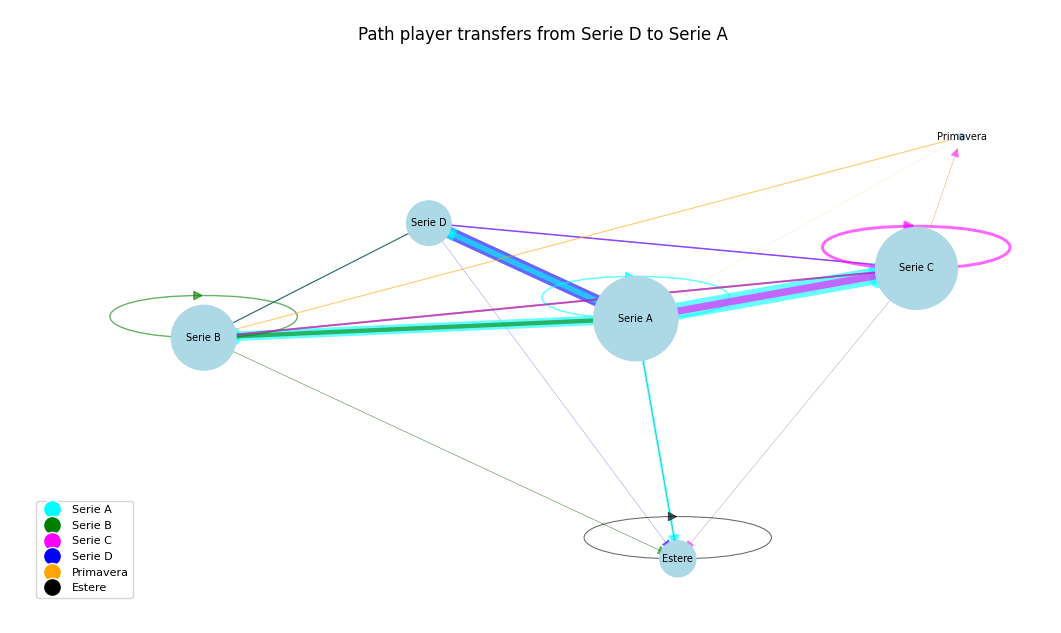

Interessante notare come questo grafo evidenzi che vi sono veramente tanti giocatori che dalla serie D passano direttamente alla serie A; da notare però come anche l'arco che collega serie A a sedie D sia spesso, proprio a sottolineare che in realtà tantissimi giocatori che fanno il salto dalla serie D alla serie A, lo fanno per un periodo inferiore ai 18 mesi e dunque non sia un possibile considerarlo come un passaggio definitivo verso la top serie.  

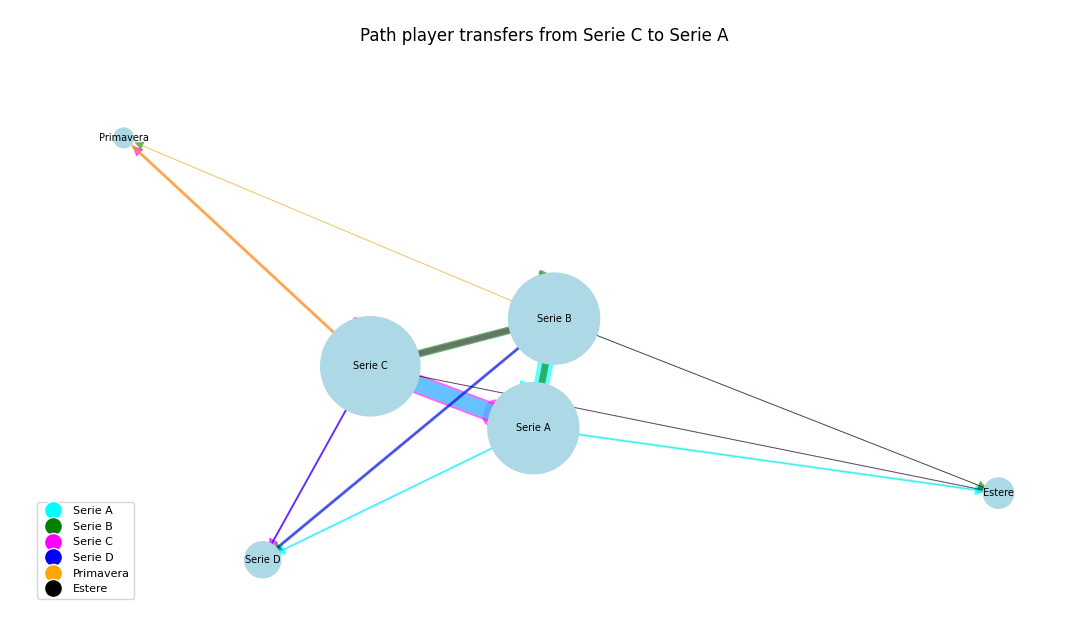

Anche in questo caso, come per la Serie D, tra i nodi in uscita della Serie C (fucsia) il più grosso è quello che va diretto alla Serie A. Allo stesso tempo, così come per la Serie D, sono tanti i giocatori che dalla Serie A fanno marcia indietro (archi celesti) entro 18 mesi, in particolare tornando in Serie C o andando in Serie B, ma alcuni addirittura effettuano un downgrade finendo in Serie D.

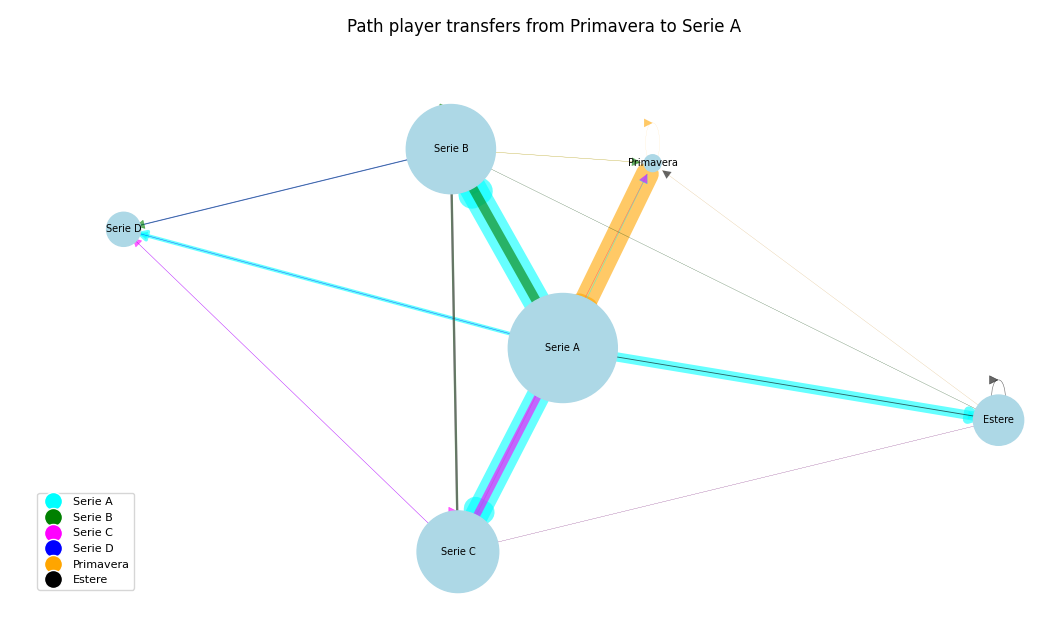

Ricordando che gli archi in uscita dalla Primavera sono arancio, vediamo che la quasi totalità dei calciatori anche in questo caso passa dalla Primavera alla Serie A.  Tanti di essi vengono poi rispediti verso le Serie minori, soprattutto verso la Serie B e verso la Serie C.

Di seguito il grafico a barre in cui ad ogni Serie corrisponde il numero medio di passaggi che un giocatore deve attraversare per arrivare in Serie A:

Per quanto riguarda invece la parte di analisi a **livello micro** prendiamo in considerazione le specifiche squadre che i calciatori attraversano nel percorso per arrivare alla Serie A.

Lo scopo di questa parte è di capire quali sono le squadre che maggiormente fanno da ‘ponte’ più rapido per i calciatori che partono dalle serie minori fino ad arrivare al massimo livello del calcio italiano, ovvero quelle squadre attraverso le quali un calciatore transitandoci, tende in media ad abbreviare il suo percorso di raggiungimento della Serie A.

Anche in questo caso avremo tre grafi: uno per i calciatori che partono da squadre di Serie D, uno per i calciatori che partono da squadre di Serie C, ed uno per i calciatori che partono da squadre Primavera, come è possibile visionare di seguito. 


In [ ]:

dict_of_edges = (data3.groupby('player_name').apply(lambda x: list(map(tuple, zip(x['team1'],x['team2'])))).to_dict())

#CREATE GRAPH
G = nx.MultiDiGraph()

for k,v in dict_of_edges.items():
    G.add_edges_from((edge for edge in v), player_ID = k)

print("Edges with attributes: ",G.edges.data())

team_list = df_serie.team1.to_list()

for node in G.nodes:
    if node in team_list:
        G.nodes[node]['league_team'] = prova = df_serie.loc[(df_serie['team1'] == node), 'league_team1'].to_list()[0]
    else:
        G.nodes[node]['league_team'] = 'other'

in_degrees = G.in_degree
out_degrees = G.out_degree
# # Identify nodes for removal
nodes2remove_indegrees = [node[0] for node in in_degrees if node[1] < 2 ]
nodes2remove_outdegrees = [node[0] for node in out_degrees if node[1] <= 1 ]
nodes2remove1 = set(nodes2remove_indegrees)
nodes2remove2 = set(nodes2remove_outdegrees)
nodes2remove3 = list(nodes2remove1.intersection(nodes2remove2))

# # Remove target-nodes
for node in nodes2remove3:
    G.remove_node(node)


edgelist = G.edges
dict_edges_occurences = {}

for edge in edgelist:
    if (edge[0], edge[1]) not in dict_edges_occurences:
        dict_edges_occurences[(edge[0], edge[1])] = 1
    else:
        dict_edges_occurences[(edge[0], edge[1])] += 1

#print(dict_edges_occurences)

print(G.nodes(data=True))
serieD = [nodo for nodo, at in G.nodes(data=True) if at['league_team'] == 'ITA4']
serieC = [nodo for nodo, at in G.nodes(data=True) if at['league_team'] == 'ITA3']
Primavera = [nodo for nodo, at in G.nodes(data=True) if at['league_team'] == 'ITAJ']
serieA = [nodo for nodo, at in G.nodes(data=True) if at['league_team'] == 'ITA1']
estera = [nodo for nodo, at in G.nodes(data=True)if at ['league_team']=='other']
bw_centrality = nx.betweenness_centrality_subset(G, sources= serieD, targets= serieA, normalized=False)

print("\n\nBetweenness Centrality: ", bw_centrality)


size_map = []
for i in G.nodes:
    for node, bw in bw_centrality.items():
        if node == i:
            size_map.append((bw + 1 ) * 20)

color_map = []
for i in G.nodes:
    if i in serieA:
        color_map.append('aquamarine')
    elif i in serieD:
        color_map.append('lightblue')
    elif i in estera:
        color_map.append('red')
    else:
        color_map.append('blue')


for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())


fig, ax = plt.subplots(figsize=(45, 35))
pos = nx.spring_layout(G, k=3*1/np.sqrt(len(G.nodes())), iterations=10)

nx.draw_networkx_nodes(G, pos=pos, node_color = color_map, node_size =size_map, alpha = 1 )

nx.draw_networkx_edges(G,
                       pos=pos,
                       edgelist = dict_edges_occurences.keys(),
                       width=list(i / 8 for i in dict_edges_occurences.values()),
                       edge_color='grey',
                       alpha=0.6,
                       arrows= True,
                       arrowsize=1)

nx.draw_networkx_labels(G, pos=pos, font_size=8)

legend_elements1 = [Line2D([0], [0], marker='o', color='w', label='Serie A',markerfacecolor='aquamarine', markersize=15),
                    Line2D([0], [0], marker='o', color='w', label='Serie D',markerfacecolor='lightblue', markersize=15),
                    Line2D([0], [0], marker='o', color='w', label='SerieB-SerieC-Primavera',markerfacecolor='blue', markersize=15),
                    Line2D([0], [0], marker='o', color='w', label='Estere',markerfacecolor='red', markersize=15)]

ax.legend(handles=legend_elements1, loc='lower left', prop={'size': 10})
fig.suptitle("Team Path player from SerieD to Serie A")
plt.axis('off')
plt.show()


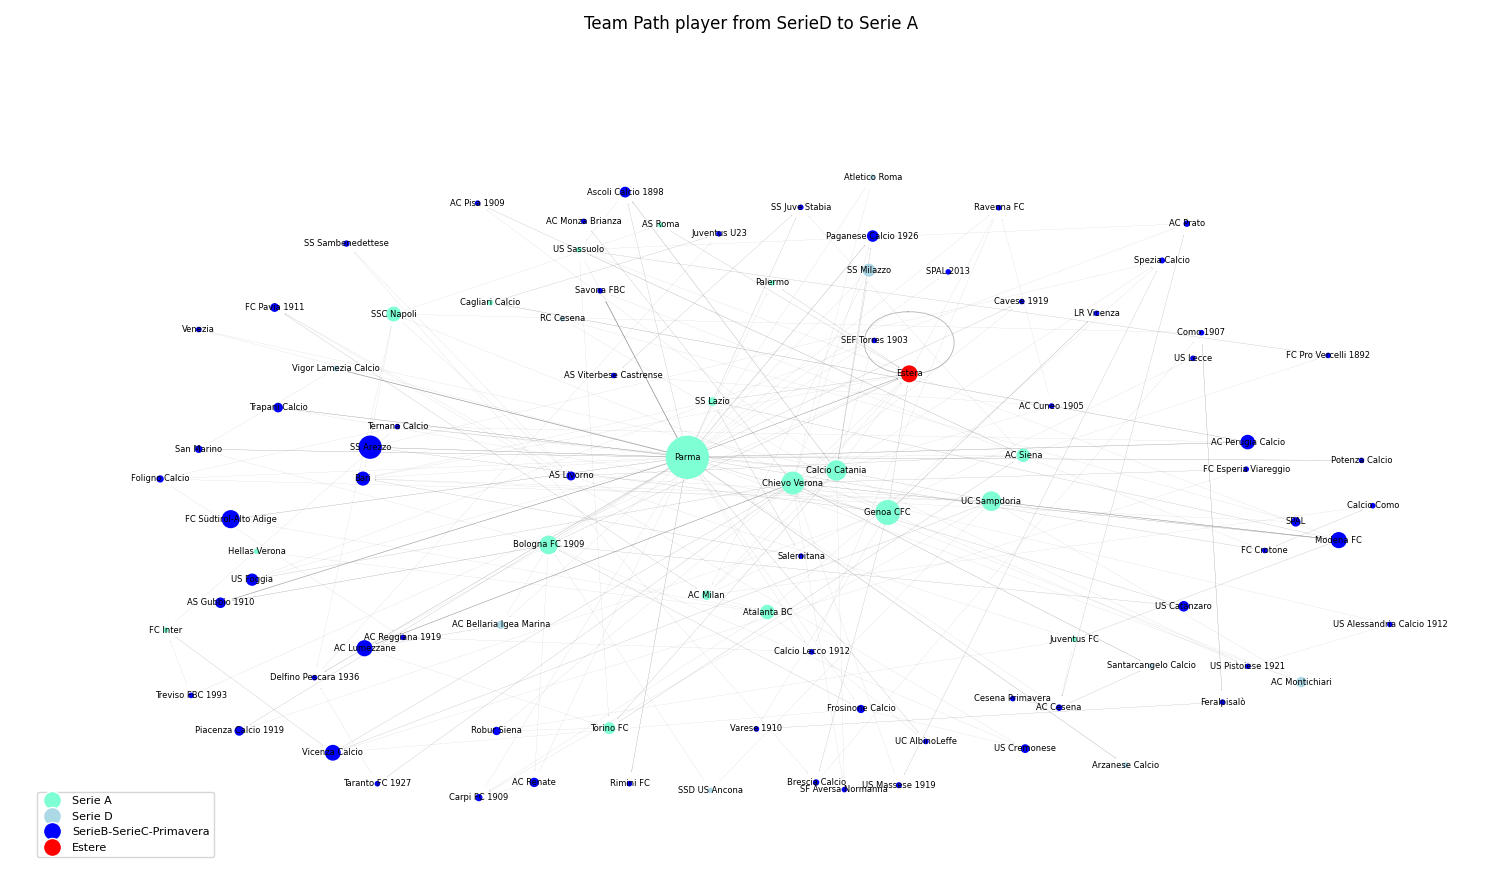

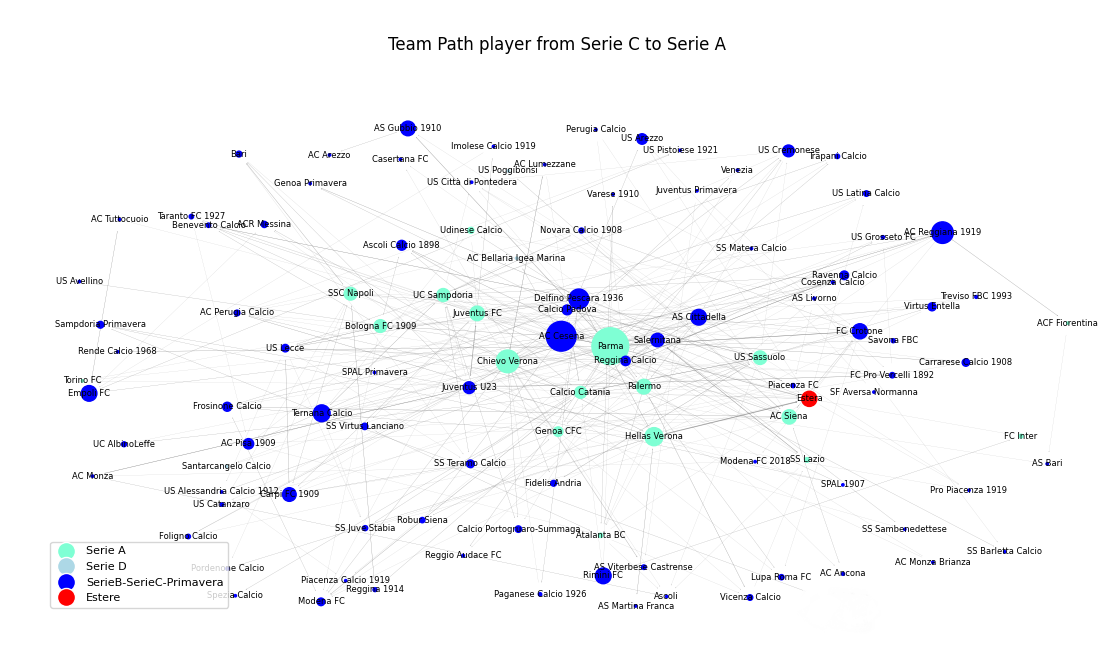

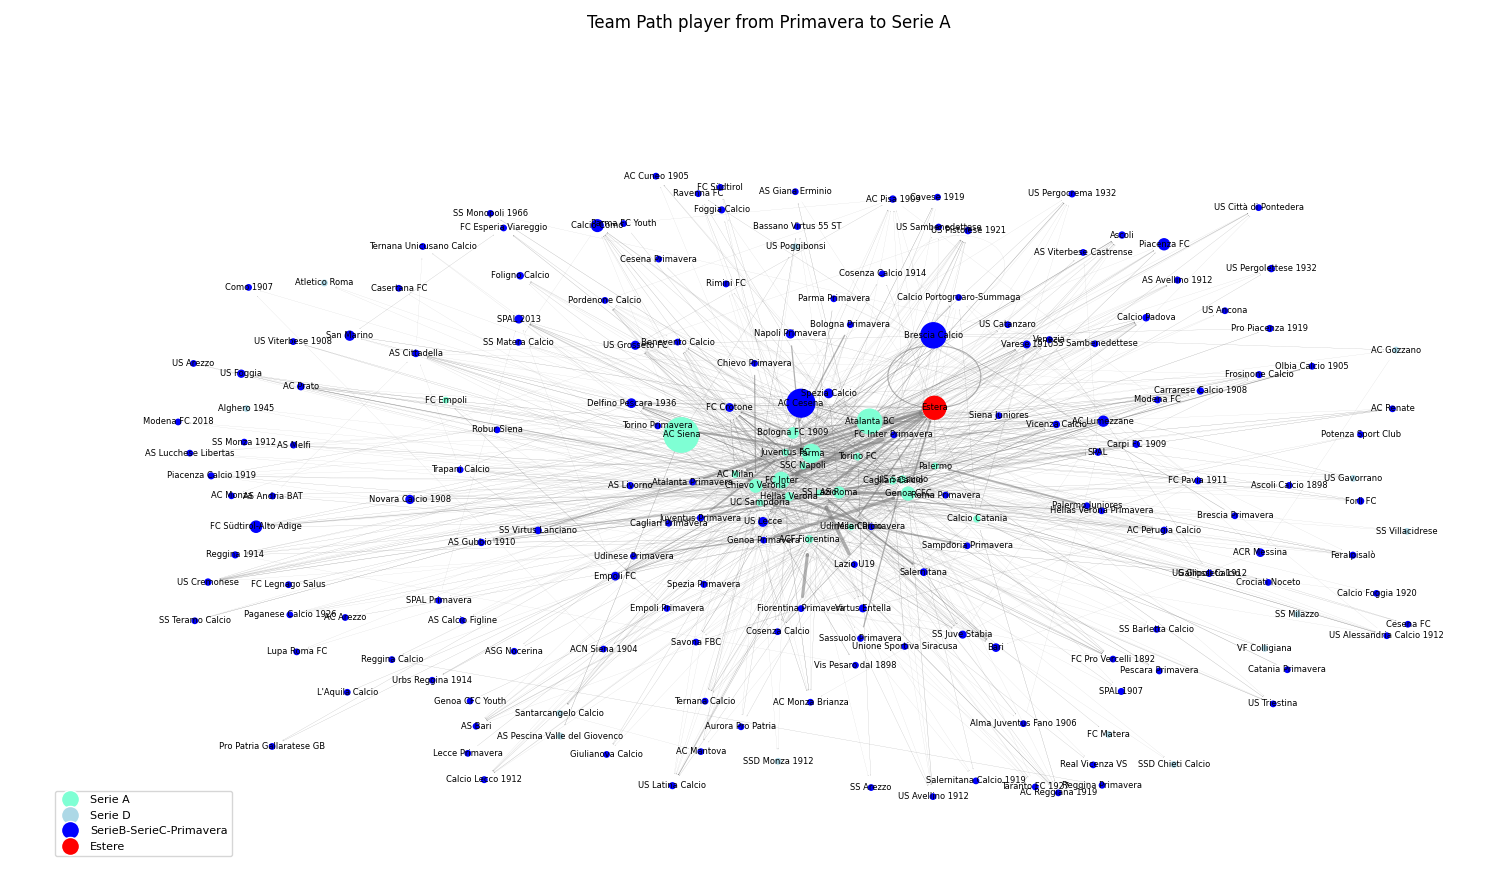

Per questo grafo, data l’eccessiva numerosità di nodi e l’eccessiva densità nella parte centrale, presentiamo di seguito uno zoom della parte più interna del grafo.

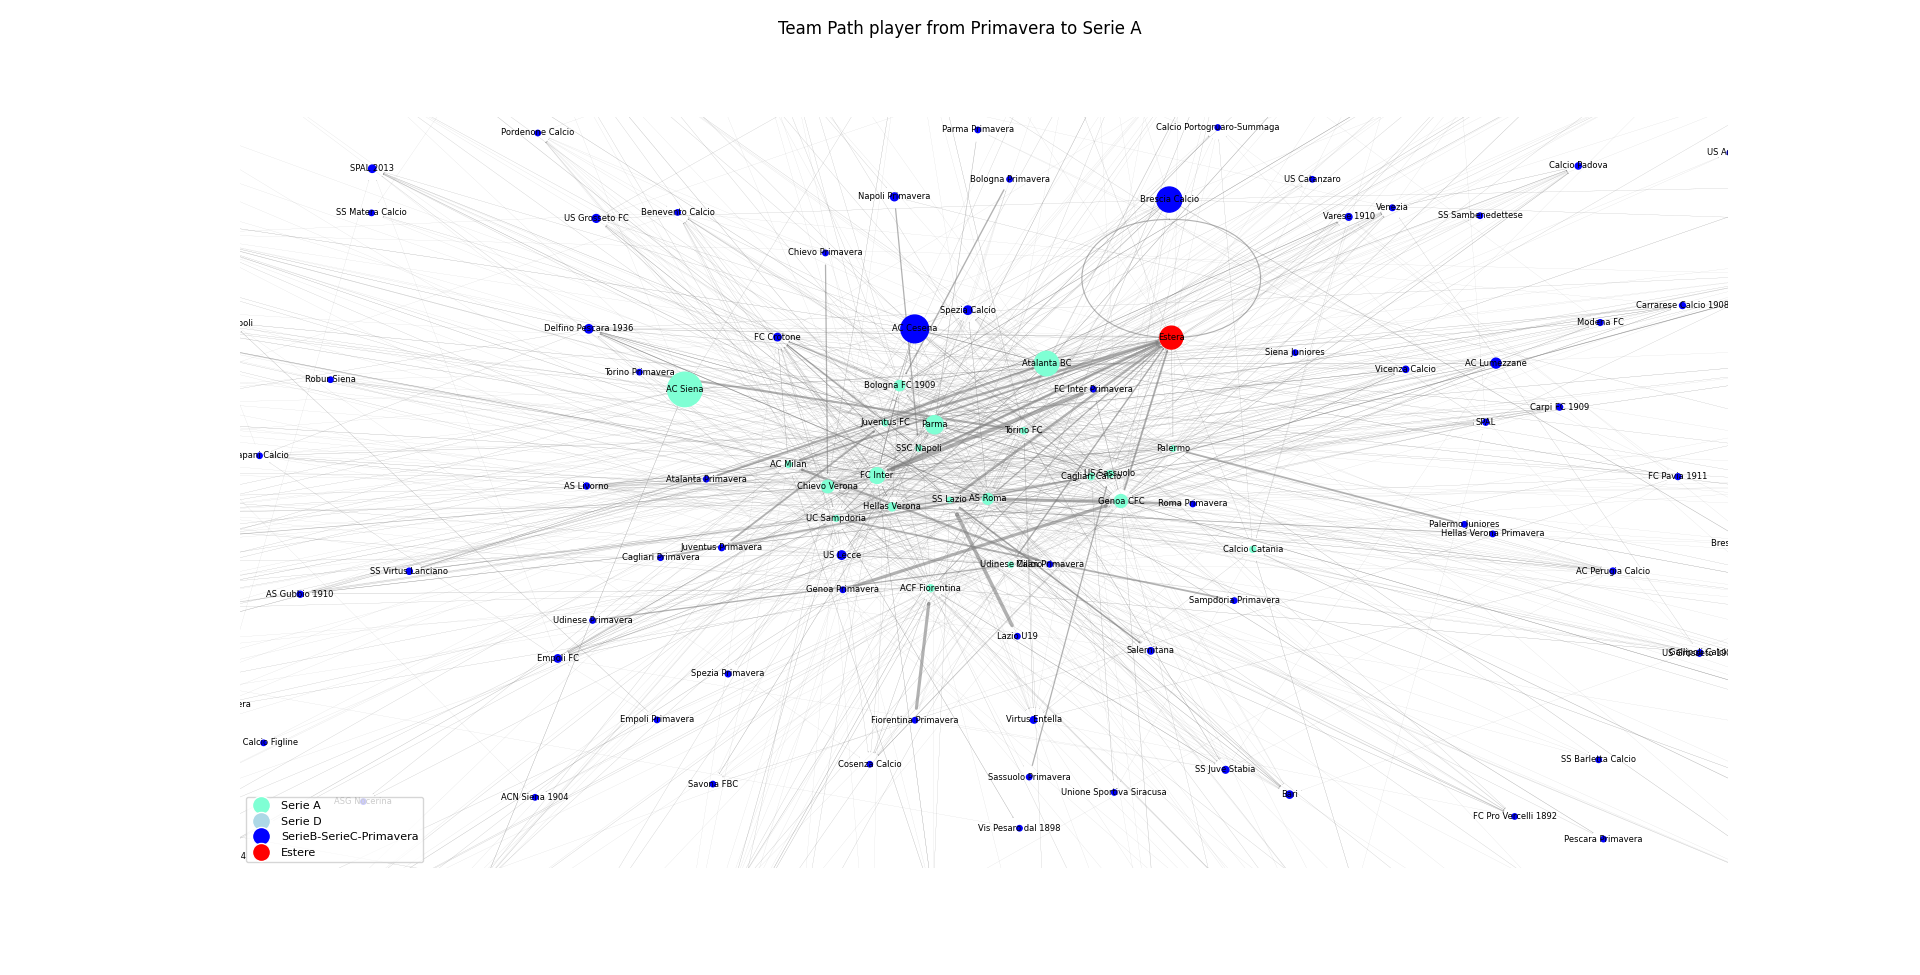

In questi grafi la grandezza dei nodi stavolta è direttamente proporzionale alla loro betweenness centrality, a rappresentare il fatto che le squadre i cui nodi risultino con la più alta betweenness centrality siano quelle squadre che permettono ai calciatori di accorciare il loro percorso dalle Serie minori verso la Serie A.

Come già in parte si poteva intuire dalla rappresentazione dei grafi, sono le 7 per ogni grafo le squadre con la più alta betweenness centrality. Di seguito, vengono mostrati 3 diagrammi a barre, uno per ogni grafo, che mostrano le top 7 squadre per betweenness centrality.  


In [ ]:
#### TOP 7 BETWEENNESS CENTRALITY TEAMS ####
betwenneess_list = sorted(bw_centrality.items(), key=lambda x: x[1], reverse=True)

top7_bw_centrality = betwenneess_list[:7]

print(top7_bw_centrality)

plt.bar(*zip(*top7_bw_centrality), color=sns.color_palette("ch:2,r=.4,l=.8"))

plt.title('Top 7 betweenness nodes - from Serie D to Serie A')
plt.xlabel('Teams')
plt.ylabel('Betweennes')
plt.xticks(rotation=15)

plt.show()

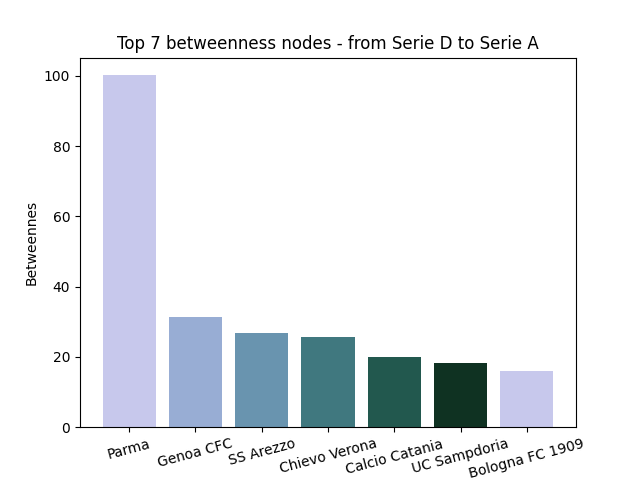

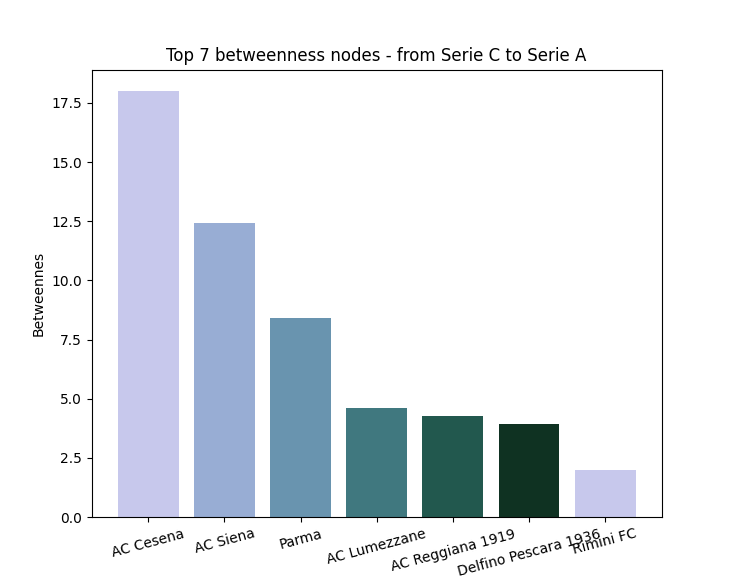

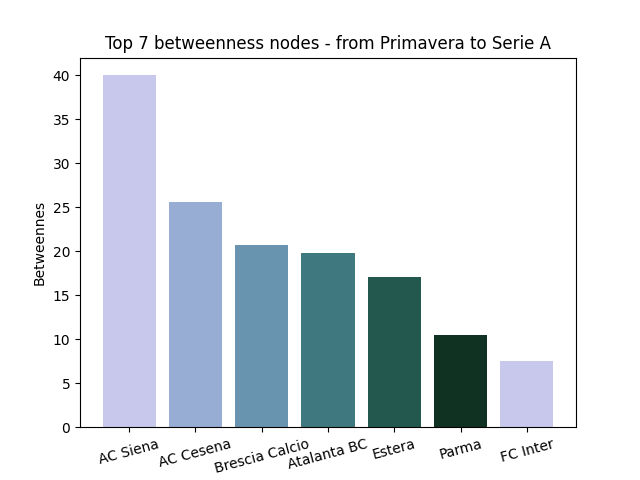

# **Quarto** **punto**

Il quarto ed ultimo punto cerca di rispondere alla domanda se sia possibile stabilire se una squadra è di alto livello, medio livello o basso livello, basandosi soltanto sulle caratteristiche dei calciatori acquistati, provando anche ad individuare quali ‘skills’ portano un calciatore a trasferirsi verso una grande squadra, verso una squadra media, o verso una squadra di basso livello.

Per ogni giocatore abbiamo a disposizione dal dataset diverse informazioni. Per effettuare l’analisi di questo quarto punto abbiamo scelto di prendere in considerazione per i calciatori tre skills ottenibili dal dataset: l’età, il valore di mercato al momento del trasferimento, il campionato di provenienza prima del trasferimento.

Per ognuna di queste 3 skill abbiamo raggruppato in diverse categorie i valori che possono assumere, come mostrato nel codice sottostante.

L'analisi è stata fatta esclusivamente sul campionato italiano e abbiamo preso in considerazione le squadre catalogando ciascuna di loro in una delle tre categorie: top club, squadra media, squadra di basso livello.
Per poter catalogare le squadre abbiamo scelto di prendere in considerazione la classifica perpetua della Serie A relativa agli ultimi 15 anni. La classifica perpetua somma i punti ottenuti, anno per anno, delle squadre che hanno partecipato al campionato di Serie A.

I dati sulla classifica perpetua sono stati ottenuti anch’essi dal sito Transfermarkt https://www.transfermarkt.it/serie-a/ewigeTabelle/wettbewerb/IT1  implementando un codice Python che li estrapolasse in automatico, presente nella cella sottostante. 



In [ ]:
############# SCRAPING CLASSIFICA SQUADRE ITALIANE PERPETUE #############
headers = {'User-Agent':
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.transfermarkt.it/serie-a/ewigeTabelle/wettbewerb/IT1/plus/?saison_id_von=2006&saison_id_bis=2021&tabellenart=alle"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

team = []
clubs = pageSoup.find_all('td', {'class': 'hauptlink no-border-links'})
point = []
points = pageSoup.find_all('td', {'class': 'rechts hauptlink'})

for tags in clubs:
    team.append(tags.text)
for p in points:
    point.append(p.text)

df = pd.DataFrame(list(zip(team, point)),
               columns =['team', 'point'])

for index, row in df.iterrows():
     df.at[index, 'league'] = "ITA1"

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df.to_csv("squadre_per_fascia/squadre_ita_eterne.csv", index = False)

###### PREPROCESSING QUARTO QUESITO ##################
df = pd.read_csv("https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/dataset_pulitoCUT07-21.csv")
df= df[(df['season']>2009)&(df['season']<2020)]
df1 = pd.read_csv("squadre_per_fascia//squadre_ita_eterne.csv")
lista = list(df1.team)
df2 = df[df['team2'].isin(lista)].copy()
df2.sort_values(['team2','season'], ascending=[True, True], inplace=True)
#df2.to_csv("Dataset//merged_squadre_ita.csv")

In [ ]:

dataframe = pd.read_csv("https://raw.githubusercontent.com/apiroddi8/network-economy/main/Dataset/merged_squadre_ita.csv")
df_ita_eterne = pd.read_csv("https://raw.githubusercontent.com/apiroddi8/network-economy/main/squadre_per_fascia/squadre_ita_eterne.csv")

df = dataframe[dataframe['country_team2'] == 'Italy']

df.loc[df['player_age']<=22, 'age'] = '17-22'
df.loc[df['player_age'].between(23,28), 'age'] = '23-28'
df.loc[df['player_age'].between(29,34), 'age'] = '29-34'
df.loc[df['player_age'].between(35,40), 'age'] = '35-40'
df = df.dropna()

df_filtered = df[(df['market_value'] != 'NF') & (df['market_value'] != '-')]
df_filtered = df_filtered.astype({'market_value': float },errors='raise')


df_filtered.loc[df_filtered['market_value'] <= 8000000.0, 'market_value_cat'] = 'low_value'
df_filtered.loc[(df_filtered['market_value'] <= 16000000.0) & (df_filtered['market_value'] > 8000000.0), 'market_value_cat'] = 'medium_value'
df_filtered.loc[(df_filtered['market_value'] <= 24000000.0) & (df_filtered['market_value'] > 16000000.0), 'market_value_cat'] = 'high_value'
df_filtered.loc[df_filtered['market_value'] > 24000000.0, 'market_value_cat'] = 'top_value'
df_filtered = df_filtered.dropna()

top_EU_leagues=['ENG1','SPA1','GER1','POR1','FRA1']
top_SA_leagues=['ARG','BRA','URU']
EU_leagues=['NET1','BEL','CRO','GRE','RUS','ENG2','SWI','ROM','SPA2','SWE','FRA2','SER','DEN','TUR','UKR','CZE','SLO','POL','UNI','HUN']
SA_leagues=['CHI','COL','PAR','VEN','BOL','PER']

df_filtered.loc[df_filtered['league_team1'].isin(top_EU_leagues),'league_team1']='TOP EU'
df_filtered.loc[df_filtered['league_team1'].isin(top_SA_leagues),'league_team1']='TOP SA'
df_filtered.loc[df_filtered['league_team1'].isin(EU_leagues),'league_team1']='LOW EU'
df_filtered.loc[df_filtered['league_team1'].isin(SA_leagues),'league_team1']='LOW SA'
df_filtered.loc[(df_filtered['league_team1']!='TOP EU')&(df_filtered['league_team1']!='TOP SA')&(df_filtered['league_team1']!='LOW EU')&(df_filtered['league_team1']!='LOW SA'),'league_team1']='OTH'


G = nx.from_pandas_edgelist(df_filtered, "team2", "age", edge_attr= 'age',create_using=nx.MultiGraph)
G2 = nx.from_pandas_edgelist(df_filtered, "team2", "league_team1", edge_attr= 'league_team1',create_using=nx.MultiGraph)
G4 = nx.from_pandas_edgelist(df_filtered, "team2", "market_value_cat", edge_attr= 'market_value_cat' ,create_using=nx.MultiGraph)
G_G2 = nx.compose(G, G2)
B=nx.compose(G_G2,G4)

print("Number of nodes:", B.number_of_nodes())
print("Number of edges:", B.number_of_edges())
print('Nodes: ', B.nodes)

edgelist = B.edges
dict_edges_occurences = {}

for edge in edgelist:
    if (edge[0], edge[1]) not in dict_edges_occurences:
        if edge[1] == 'Italy':
            dict_edges_occurences[(edge[0], edge[1])] = 0.1
        else:
            dict_edges_occurences[(edge[0], edge[1])] = 1
    else:
        if edge[1] == 'Italy':
            dict_edges_occurences[(edge[0], edge[1])] += 0.1
        else:
            dict_edges_occurences[(edge[0], edge[1])] += 1

print(dict_edges_occurences)


color_map = []
team_list = df_filtered.team2.tolist()
team_levelTOP = ['Juventus FC','FC Inter','AS Roma','AC Milan','SSC Napoli','SS Lazio', 'UC Sampdoria']
team_levelMEDIUM = ['Genoa CFC','Cagliari Calcio', 'Torino FC', 'Bologna FC 1909', 'Chievo Verona', 'Palermo', 'Parma']
team_levelLOW = ['Delfino Pescara 1936', 'Novara Calcio 1908', 'Salernitana', 'Ascoli Calcio 1898', 'Venezia', 'ACR Messina']
league_list = df_filtered.league_team1.tolist()
age_list = df_filtered.age.unique().tolist()
market_value_list = ['low_value', 'medium_value', 'high_value', 'top_value']
for node in B.nodes:
    if node in team_levelTOP:
        color_map.append('blue')
    elif node in team_levelMEDIUM:
        color_map.append('cyan')
    elif node in team_levelLOW:
        color_map.append('dodgerblue')
    elif node in league_list:
        color_map.append('green')
    elif node in market_value_list:
        color_map.append('yellow')
    else:
        color_map.append('orange')


legend_elements1 = [Line2D([0], [0], marker='o', color='w', label='Serie A - TOP ',markerfacecolor='blue', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Serie A - MEDIUM',markerfacecolor='cyan', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Serie A - LOW',markerfacecolor='dodgerblue', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='League',markerfacecolor='green', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Market value',markerfacecolor='yellow', markersize=13),
                    Line2D([0], [0], marker='o', color='w', label='Age',markerfacecolor='orange', markersize=13)]


pos = nx.kamada_kawai_layout(B)
fig, ax = plt.subplots(figsize=(40, 35))
nx.draw_networkx_nodes(B,pos,
                       nodelist=B.nodes,
                       node_color=color_map,
                       node_size= 120,
                       alpha=0.7)
nx.draw_networkx_edges(B,
                       pos=pos,
                       edgelist = dict_edges_occurences.keys(),
                       width=list(i / 15 for i in dict_edges_occurences.values()),
                       edge_color='lightgray',
                       alpha=0.6)
nx.draw_networkx_labels(B, pos=pos,
                        labels=dict(zip(B.nodes,B.nodes)),
                        font_color='black',
                        font_size=10)

ax.legend(handles=legend_elements1, loc='lower right', prop={'size': 10})
plt.show()


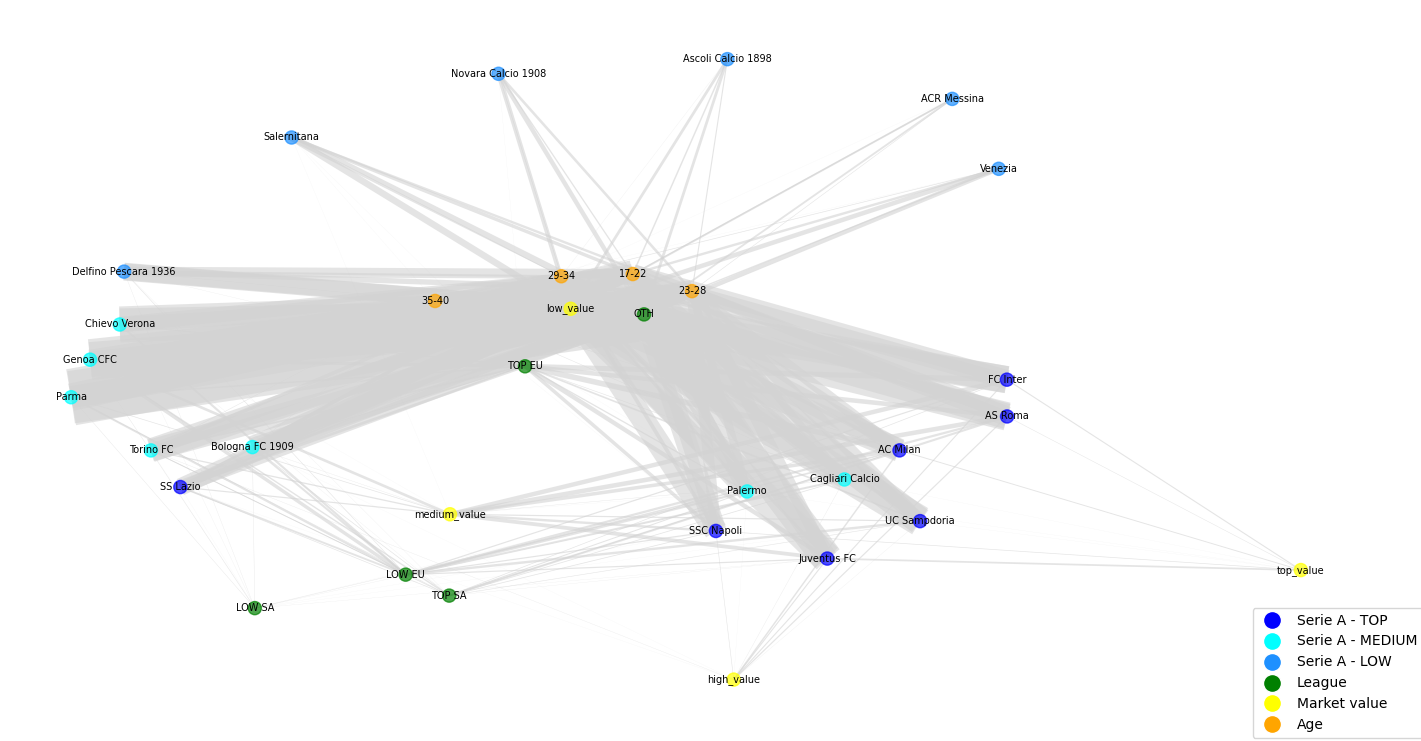

È possibile vedere come le squadre (di cui già conosciamo l’etichetta TOP, MEDIUM o LOW grazie alla classifica perpetua) vengano divise quasi alla perfezione dal grafo nei cluster di appartenenza.
Le eccezioni riguardano:

- Palermo e Cagliari, che pur essendo squadre medie nel grafo risultano molto ravvicinate alle squadre top

- La Lazio, per cui vale l’inverso
- Il Pescara, che si avvicina maggiormente alla zona delle squadre medie pur essendo stata pre etichettata come squadra di fascia bassa.

In realtà, nonostante la suddivisione del grafo sia corretta, occorre specificare che probabilmente gran parte del ‘lavoro’ è svolto dalla skill market value, che anche dal grafo sembra essere quella più capace di tirare le squadre da una parte o dall’altra del grafo.

Per quanto riguarda invece le altre due skill, in particolar modo per la skill età, non sembrano essere discriminanti per differenziare le diverse fasce di squadre, e questo probabilmente spiega il perché siano anche le skill più centrali nel grafo, comuni a tutte le squadre indifferentemente.


# **Conclusioni**

Per mezzo della network analysis effettuata abbiamo raggiunto il nostro obiettivo di fornire delle risposte ai quesiti iniziali che ci hanno spinto a scegliere di svolgere questo progetto.


L’analisi svolta inoltre, ci suggerisce come si tratti di una sfera, quella del calciomercato, con un enorme potenziale di dati da sfruttare, e come dunque il nostro lavoro possa essere in futuro anche ulteriormente ampliato.

In primo luogo, il lavoro potrebbe dunque essere esteso non solo ad un’analisi concentrata sull’Italia ma anche sugli altri importanti campionati europei, favorendo anche l’occasione di un migliore confronto tra essi.

In secondo luogo ad essere esteso potrebbe essere il lasso di tempo da prendere in considerazione. Il sito Transfermarkt permette di andare a recuperare i trasferimenti a ritroso senza limite temporale, fino alle date di fondazione delle squadre di calcio. 
Un’analisi più estesa dal punto di vista del tempo, potrebbe mostrare come, in un arco temporale superiore ai 15 anni analizzati, si è evoluto il calciomercato e le relative strategie delle squadre sia in Italia che nel resto d’Europa.